In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
pd.set_option('display.max_columns', 50000)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import where, meshgrid, arange, hstack, std, mean
import matplotlib.pyplot as plt

In [2]:
#importing the data
data = pd.read_csv('dataset 2_epi_r.csv')
data = data[data['dessert'] == 1.0]

data['nutrition'] = data['fat'] + data['protein'] + data['sodium']

data2 = data [['fat', 'calories', 'protein', 'sodium', 'rating', 'cake', 'nutrition']]
data2 = data2.iloc[0:800:2]
data2

fat  calories  protein  sodium  rating  cake  nutrition
12    48.0     766.0     12.0   439.0   4.375   1.0      499.0
29     5.0     311.0      5.0   226.0   4.375   0.0      236.0
40    35.0     483.0      5.0   100.0   4.375   1.0      140.0
64     7.0     252.0      4.0    89.0   3.750   0.0      100.0
68    59.0     830.0      9.0   148.0   4.375   0.0      216.0
...    ...       ...      ...     ...     ...   ...        ...
4498  36.0     437.0      9.0   342.0   4.375   0.0      387.0
4502  10.0     121.0      1.0     6.0   3.750   0.0       17.0
4518   2.0      53.0      1.0     4.0   3.750   0.0        7.0
4520   0.0      41.0      0.0     1.0   4.375   0.0        1.0
4527   NaN       NaN      NaN     NaN   3.125   0.0        NaN

[400 rows x 7 columns]

In [3]:
data2.describe()

fat     calories     protein        sodium      rating   
count  332.000000   333.000000  333.000000    333.000000  400.000000  \
mean    24.665663   506.996997    6.483483    279.405405    3.878125   
std     38.932969   703.325832    8.175993    825.884860    1.217139   
min      0.000000     6.000000    0.000000      0.000000    0.000000   
25%      8.000000   208.000000    2.000000     41.000000    3.750000   
50%     16.000000   321.000000    4.000000    116.000000    4.375000   
75%     28.000000   534.000000    8.000000    244.000000    4.375000   
max    460.000000  6841.000000   62.000000  11306.000000    5.000000   

             cake     nutrition  
count  400.000000    332.000000  
mean     0.192500    311.397590  
std      0.394757    848.011756  
min      0.000000      0.000000  
25%      0.000000     52.000000  
50%      0.000000    145.000000  
75%      0.000000    270.750000  
max      1.000000  11326.000000

In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 12 to 4527
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fat        332 non-null    float64
 1   calories   333 non-null    float64
 2   protein    333 non-null    float64
 3   sodium     333 non-null    float64
 4   rating     400 non-null    float64
 5   cake       400 non-null    float64
 6   nutrition  332 non-null    float64
dtypes: float64(7)
memory usage: 25.0 KB


In [5]:
cat_cols = ['cake']
for col in cat_cols:
    print(data2[col].value_counts())
    fig = px.histogram(data2, x=col)
    fig.show()

cake
0.0    323
1.0     77
Name: count, dtype: int64


In [6]:
num_cols = ['rating', 'calories', 'sodium', 'fat', 'protein']
for col in num_cols:
    fig = px.violin(data2, y=col, points='all', box=True)
    fig.show()

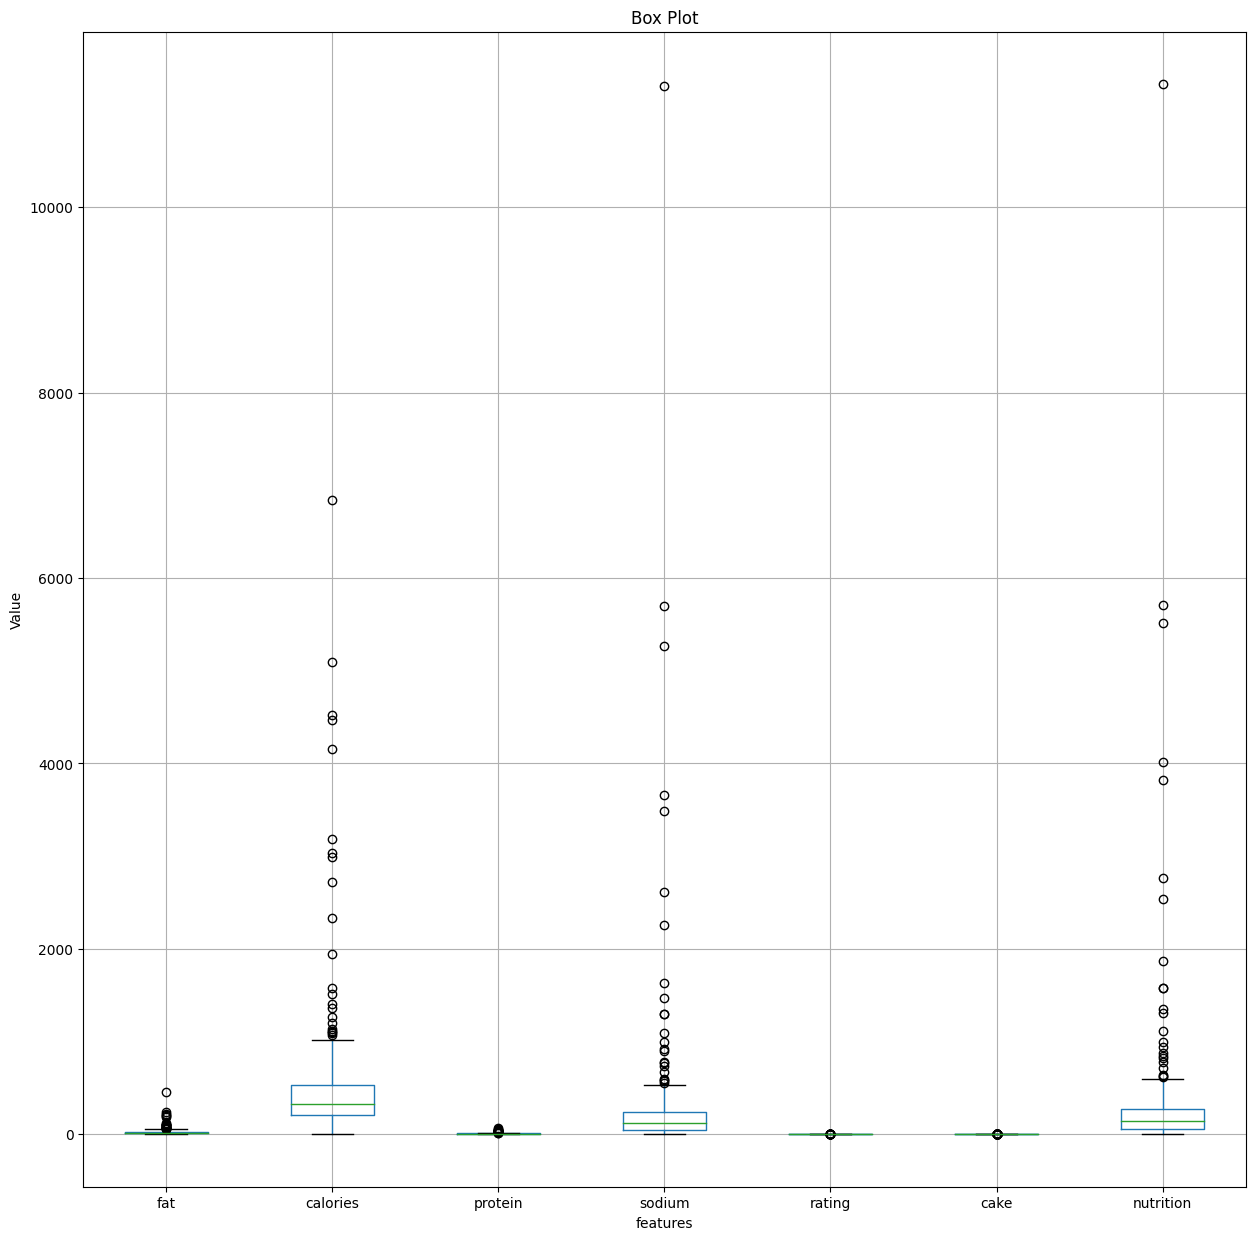

In [7]:
plt.figure(figsize=(15, 15))
data2.boxplot()

# Set the title and labels
plt.title('Box Plot')
plt.xlabel('features')
plt.ylabel('Value')

# Show the plot
plt.show()


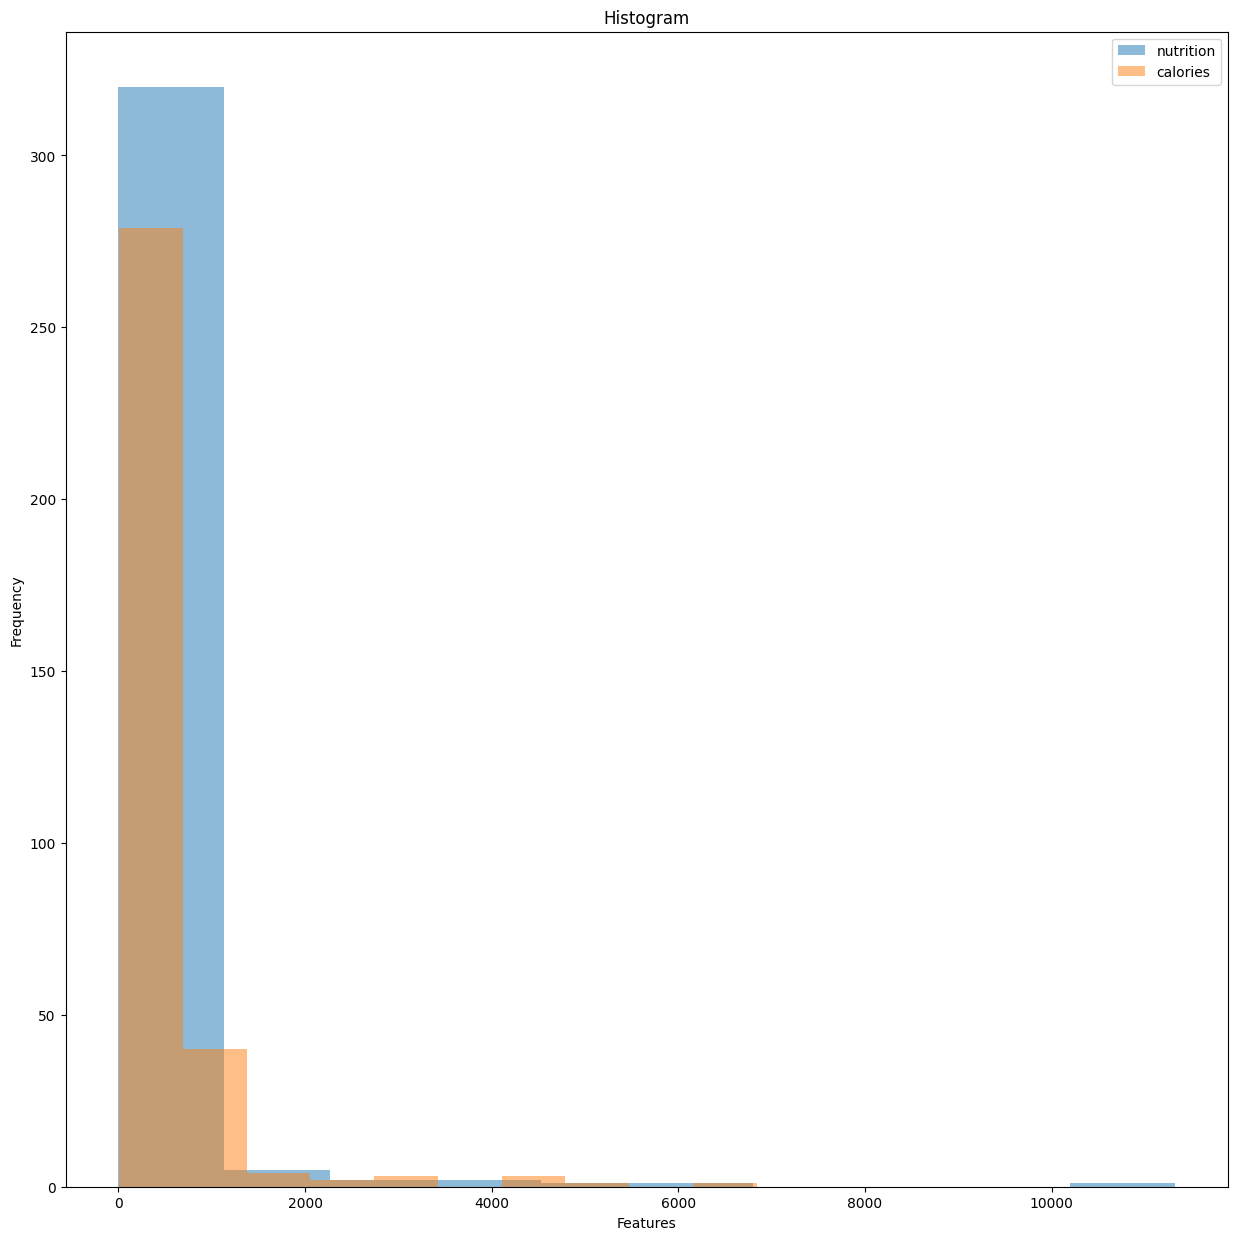

In [8]:

plt.figure(figsize=(15, 15))  # Set the figure size

# Specify the columns for the histogram
column1 = 'nutrition'
column2 = 'calories'

# Plot a histogram for the first column
plt.hist(data2[column1], bins=10, alpha=0.5, label=column1)

# Plot a histogram for the second column
plt.hist(data2[column2], bins=10, alpha=0.5, label=column2)

# Set the title and labels
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')

# Show the legend
plt.legend()

# Show the plot
plt.show()


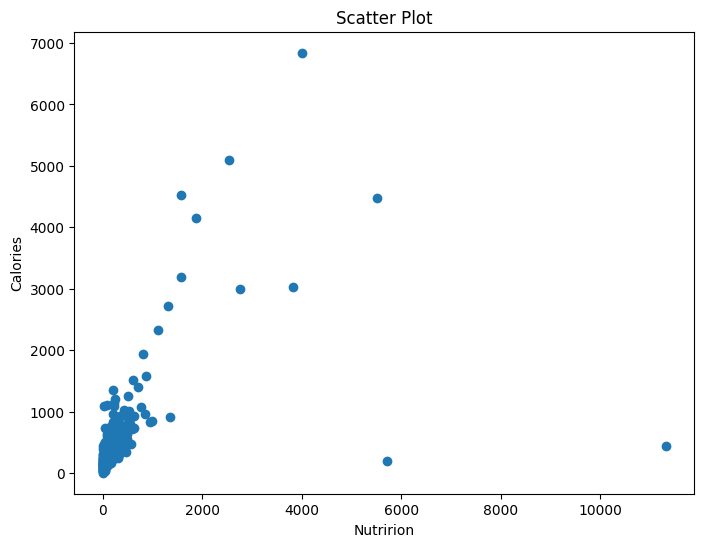

In [9]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Specify the columns for the scatter plot
x_column = 'nutrition'
y_column = 'calories'

# Create a scatter plot
plt.scatter(data2[x_column], data2[y_column])

# Set the title and labels
plt.title('Scatter Plot')
plt.xlabel('Nutririon')
plt.ylabel('Calories')

# Show the plot
plt.show()


<Figure size 1000x1000 with 0 Axes>

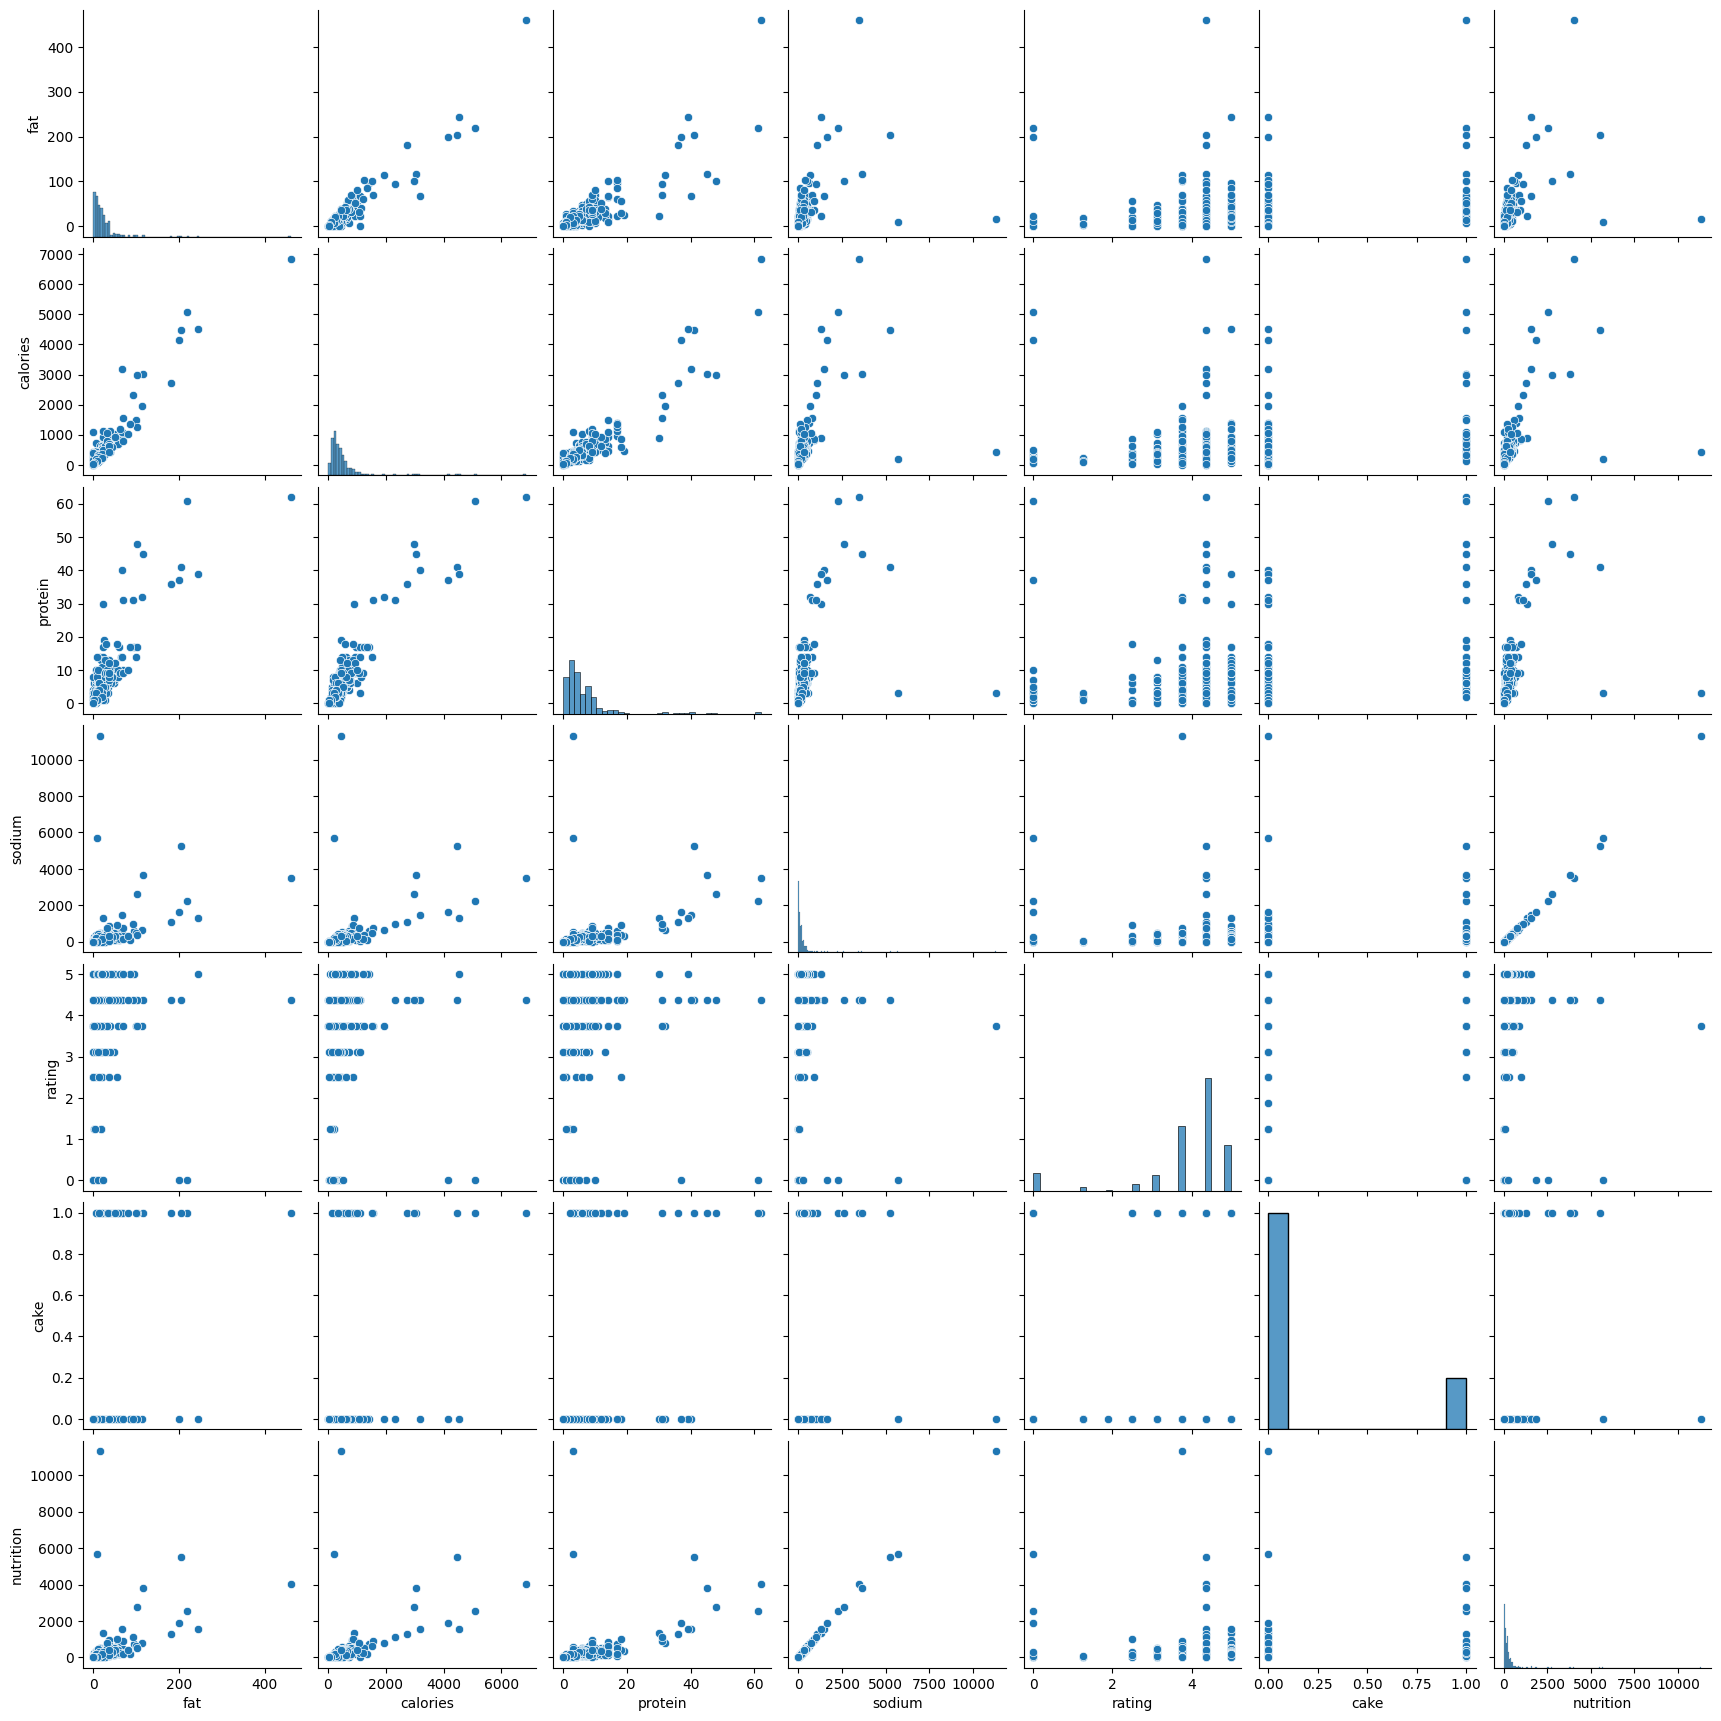

In [15]:
plt.figure(figsize=(10, 10))
sns.pairplot(data2)
plt.show()

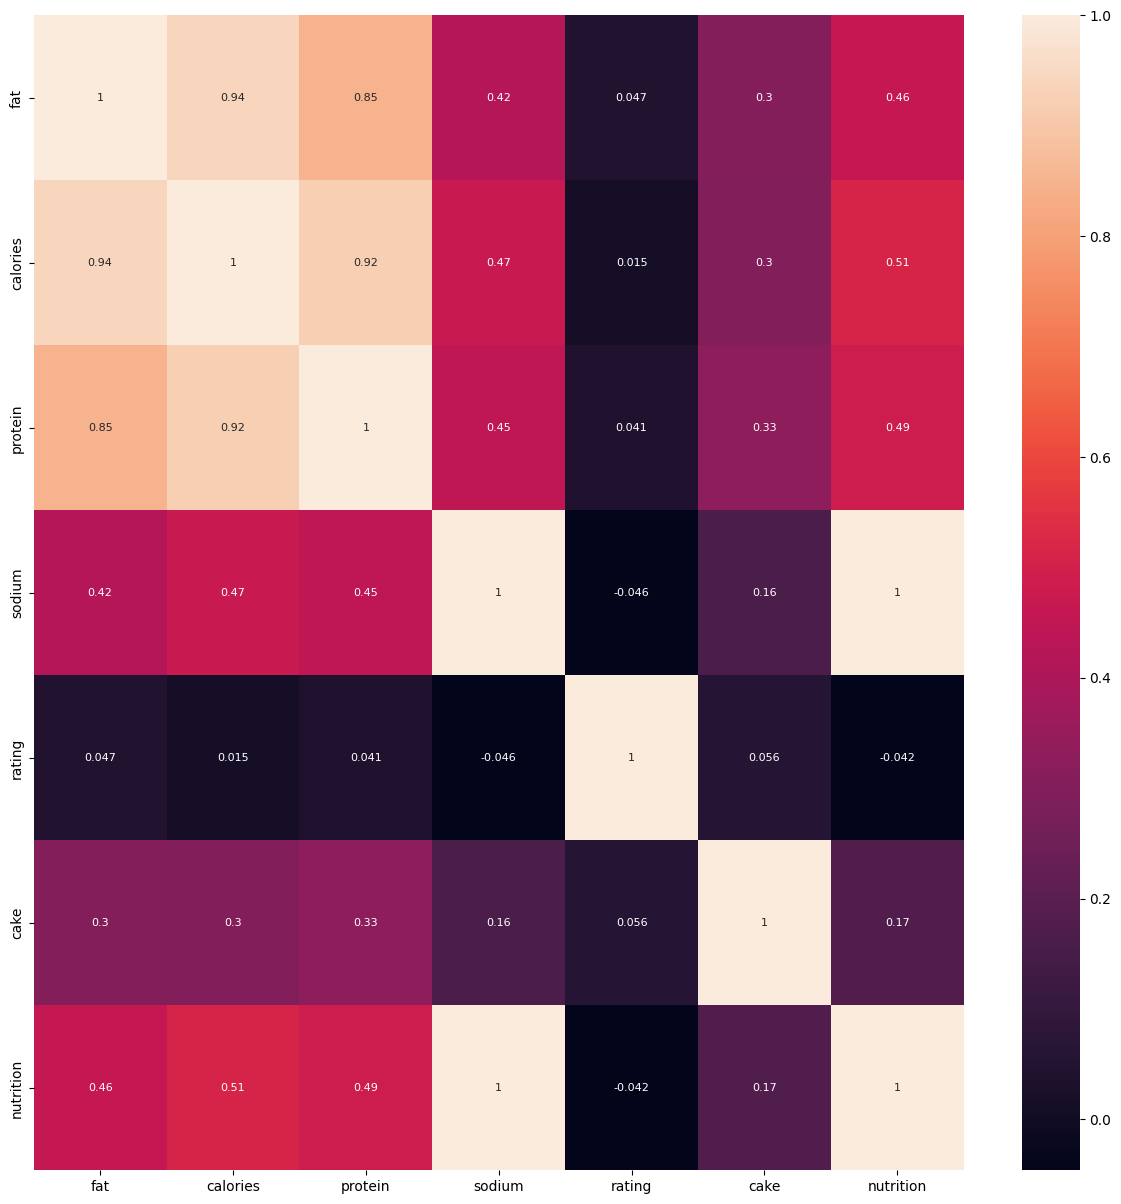

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(data2.corr(), annot = True, annot_kws={"size": 8})
plt.show()

<Axes: >

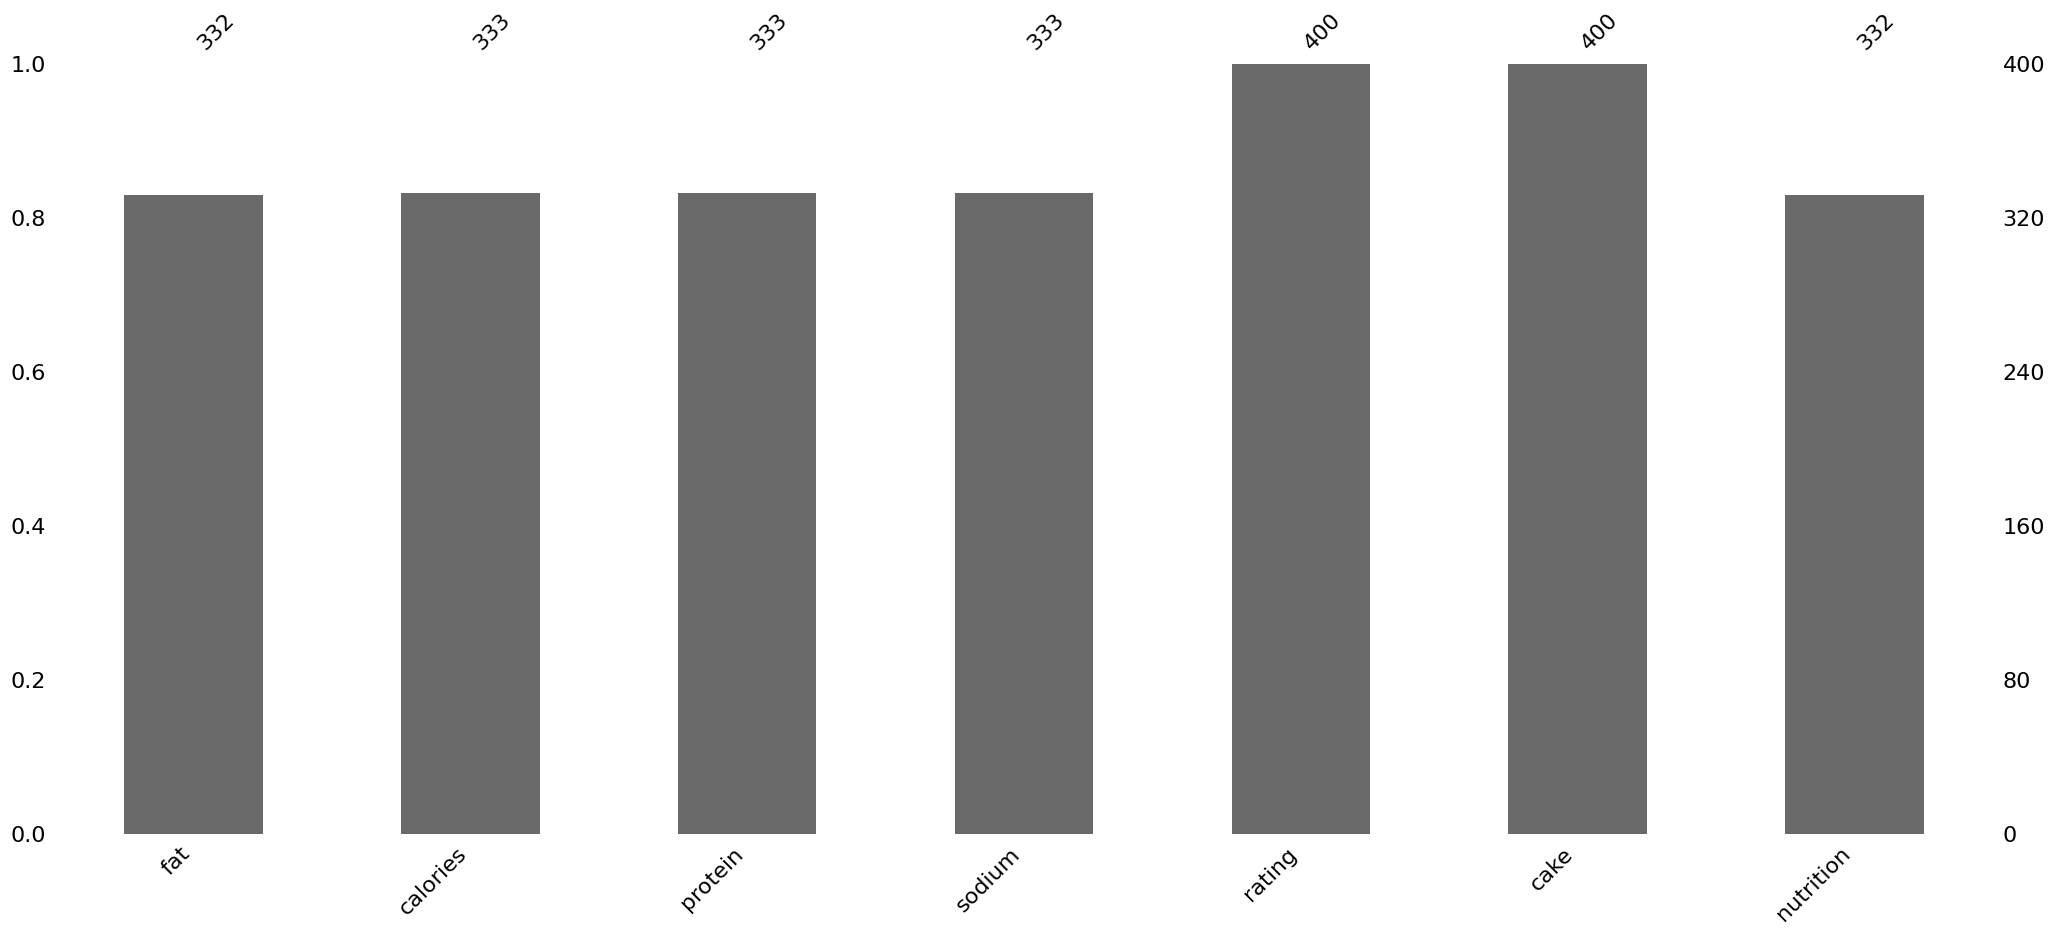

In [17]:
import missingno as msno
# Plot the missing data as bar
msno.bar(data2)

<Axes: >

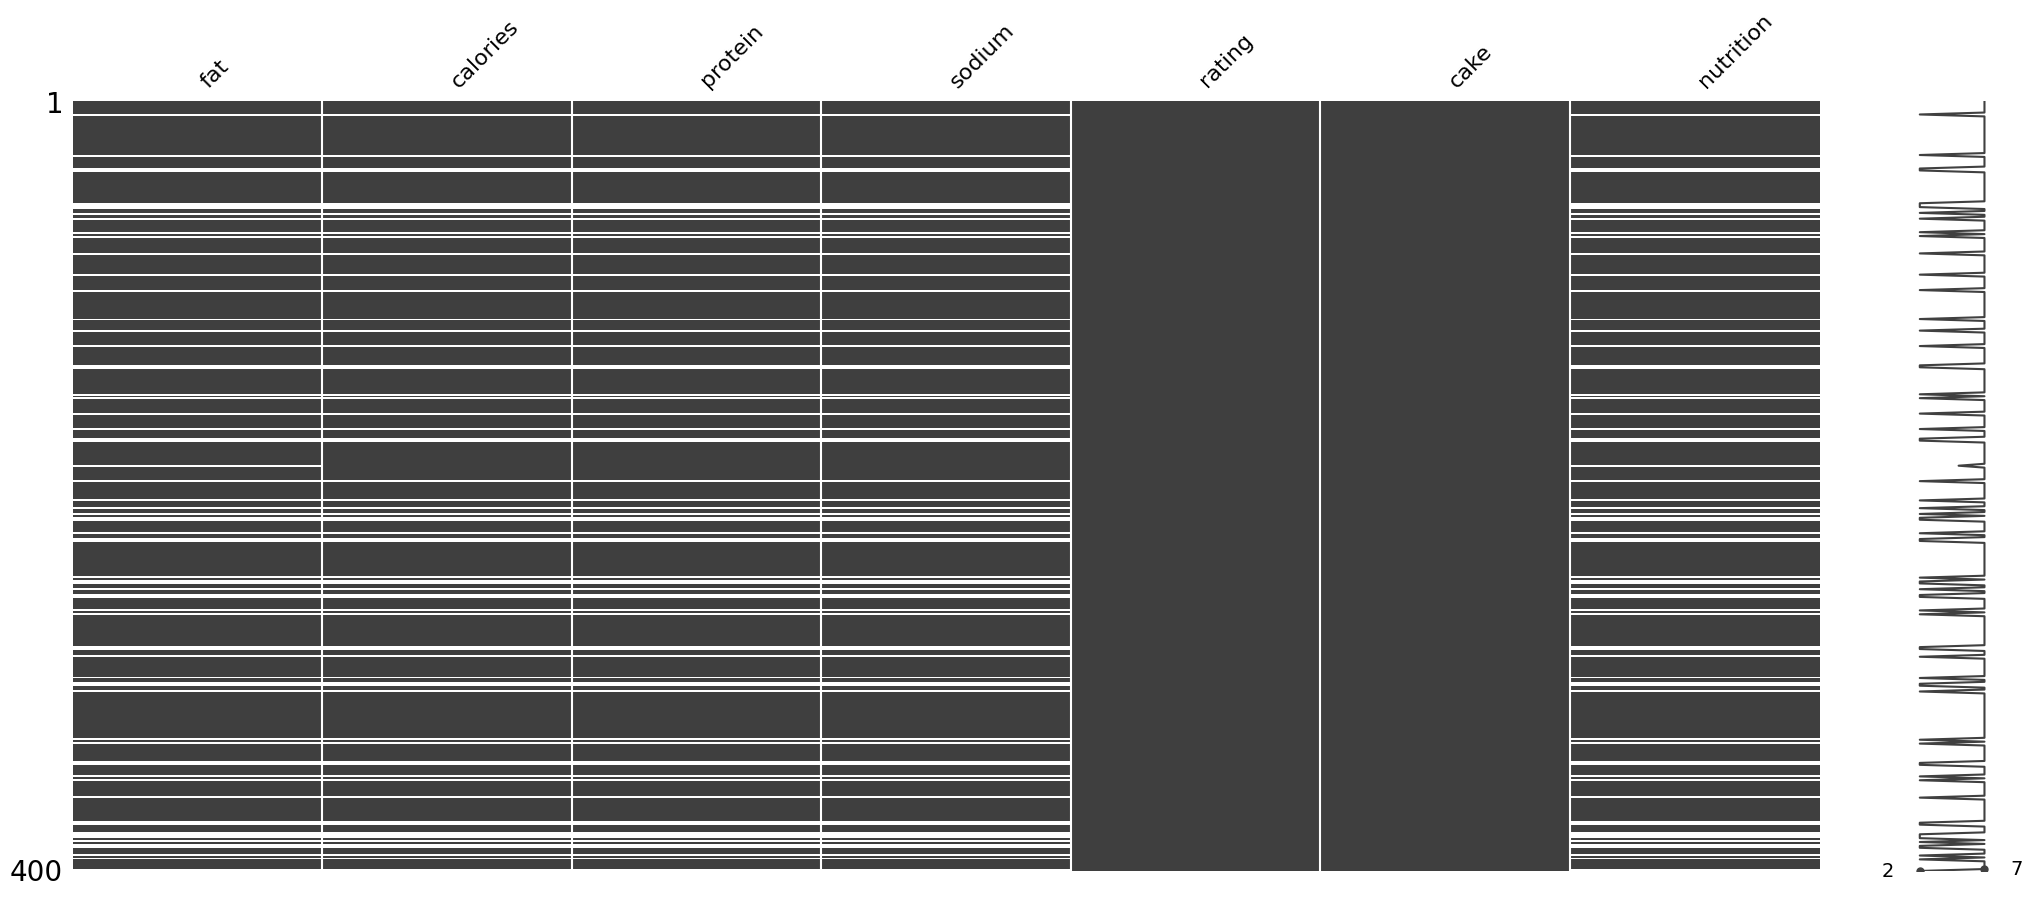

In [18]:
# Plot the missing data as a matrix
msno.matrix(data2)

# Reasoning for Type of Missing Data (NMAR)
As we can see from the bar we made that the missing values only exist in the sodium, protein, fat and calories column of our dataset. Moreover, the matrix shows that the missing values are not at random because the lines align. Secondly, since the corelation heatmap has only the shades of blue, we can infer that the missing values are corelated. Hence the values are MNAR (Missing not at Random). The missing values contain nutrients so we can safely assume that they will influence calories. When one value is missing it will affect the entire recipe hence NMAR.

In [29]:
#choosing the data for classification models

data1 = data2[['calories', 'nutrition', 'cake']]

In [30]:
from sklearn.impute import KNNImputer

# Create a new dataframe with only the numerical columns

numeric_cols = data1.select_dtypes(include=np.number).columns.tolist()
data_numeric = data1[numeric_cols]

imputer = KNNImputer(n_neighbors=5)

# Impute only the missing values in the selected data and replace missing values in original dataframe

data_imp = pd.DataFrame(imputer.fit_transform(data_numeric), columns=numeric_cols)
data1[numeric_cols] = data_imp

# Reasoning for the Handling Approach
We needed to handle missing data in our dataset, but deletion was not a good option due to the high percentage of missing values. Simple imputation was ruled out because it assumes that missing values are randomly missing, and can lead to biased estimates and loss of information. Time series imputation was not suitable because our data did not involve a time period. Iterative imputation was not chosen due to the potential for bias. Additionally, iterative imputation, after trying, proved to be computationally expensive while dealing with large datasets, since it required multiple iterations to reach convergence. This led to very long processing times. Therefore, we used KNN imputation, which preserved sample size, favored multivariates, 
reduced bias, and maintained the value and variability of the dataset. KNN imputation was also able to capture complex non-linear relationships in the data, and could be used for both continuous and categorical variables.

In [31]:
data_imp

calories  nutrition  cake
0       766.0      499.0   1.0
1       311.0      236.0   0.0
2       483.0      140.0   1.0
3       252.0      100.0   0.0
4       830.0      216.0   0.0
..        ...        ...   ...
395     437.0      387.0   0.0
396     121.0       17.0   0.0
397      53.0        7.0   0.0
398      41.0        1.0   0.0
399     426.8      185.0   0.0

[400 rows x 3 columns]

In [32]:
# defining a function that will be used to visualize the decision boundry the classifier models

def plot_decision_boundary(classifier, X, y, title):
    # Create a new figure with a specified size
    plt.figure(figsize=(12, 12))
    
    # Import the necessary libraries
    from matplotlib.colors import ListedColormap
    
    # Set the feature data and target variable
    X_set, y_set = X, y
    
    # Create a meshgrid based on the minimum and maximum values of the features in X
    # with a step size of 0.01
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    
    # Generate the contour plot using the classifier's predictions on the meshgrid points
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('green', 'red')))
    
    # Set the limits of the plot based on the meshgrid
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    # Plot the individual data points
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=['red', 'green'][i], label=j)
    
    # Add a title, x-axis label, y-axis label, and legend to the plot
    plt.title(title)
    plt.xlabel('Calories')
    plt.ylabel('Nutrition')
    plt.legend()
    
    # Display the plot
    plt.show()


In [33]:
# names of the classifiers/methods and evaluation metrics, respectively.
# used to iterate over and assign names to the rows and columns of the DataFrame
methods = ['Logistic Regression', 'KNN', 'Linear SVM', 'Kernel SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Adaboost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC AUC']

# define two functions to calculate cross-validated performance metrics for different classifiers

def eval_cv(classifier, metric,  X, y):
    k = 5
    kf = KFold(n_splits=k)
    
    # evaluate model
    scores = cross_val_score(classifier, X, y, scoring=metric, cv=kf)
    # report performance
    return mean(scores)

def calculate_cv(df, classifier, method, X, y):
    accuracy = eval_cv(classifier, 'accuracy', X, y)
    precision = eval_cv(classifier, 'precision', X, y)
    recall = eval_cv(classifier, 'recall', X, y)
    f1 = eval_cv(classifier, 'f1', X, y)
    auc = eval_cv(classifier, 'roc_auc', X, y)
    df.loc[method] = [accuracy, precision, recall, f1, auc]  

In [34]:
# create cross validation dataframe

quality_cv_df = pd.DataFrame(columns = metrics, index = methods)
display(quality_cv_df)

Accuracy Precision Recall F1 score ROC AUC
Logistic Regression      NaN       NaN    NaN      NaN     NaN
KNN                      NaN       NaN    NaN      NaN     NaN
Linear SVM               NaN       NaN    NaN      NaN     NaN
Kernel SVM               NaN       NaN    NaN      NaN     NaN
Naive Bayes              NaN       NaN    NaN      NaN     NaN
Decision Tree            NaN       NaN    NaN      NaN     NaN
Random Forest            NaN       NaN    NaN      NaN     NaN
Adaboost                 NaN       NaN    NaN      NaN     NaN

In [35]:
# function to calculate evaluation metrics using predicted and target values and store the results in a DataFrame

def calculate_metrics(df, method, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, annot_kws={"size": 16})
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    df.loc[method] = [accuracy, precision, recall, f1, auc]
    
# create error dataframe
quality_df = pd.DataFrame(columns = metrics, index = methods)
display(quality_df)

Accuracy Precision Recall F1 score ROC AUC
Logistic Regression      NaN       NaN    NaN      NaN     NaN
KNN                      NaN       NaN    NaN      NaN     NaN
Linear SVM               NaN       NaN    NaN      NaN     NaN
Kernel SVM               NaN       NaN    NaN      NaN     NaN
Naive Bayes              NaN       NaN    NaN      NaN     NaN
Decision Tree            NaN       NaN    NaN      NaN     NaN
Random Forest            NaN       NaN    NaN      NaN     NaN
Adaboost                 NaN       NaN    NaN      NaN     NaN

In [36]:
from sklearn.preprocessing import StandardScaler


# Extract the non-binary numerical columns
num_cols = [col for col in data_imp.columns if data_imp[col].dtype in ['int64', 'float64'] and data_imp[col].nunique() > 2]
num_data_imp = data_imp[num_cols]

# Perform standard scaling on the numerical columns
scaler = StandardScaler()
scaled_num_data_imp = pd.DataFrame(scaler.fit_transform(num_data_imp), columns=num_cols)

# Replace the original numerical columns with the scaled columns
data_imp[num_cols] = scaled_num_data_imp

# Print the first five rows of the scaled DataFrame
print(data_imp.head())

   calories  nutrition  cake
0  0.419354   0.264108   1.0
1 -0.290098  -0.076249   0.0
2 -0.021910  -0.200486   1.0
3 -0.382093  -0.252251   0.0
4  0.519145  -0.102132   0.0


# Reasoning for the Chosen Scaling Method
Standard scaling was a good option for scaling the non-binary numerical data in the dataset because it transforms the data so that it has a mean of 0 and a standard deviation of 1, which makes it easier to compare and work with. In this dataset, the numerical features have different ranges of values, which can be problematic for some machine learning algorithms that are sensitive to the scale of the data. For example, a feature with a large range of values might have a disproportionate impact on the model's results compared to a feature with a smaller range of values. Standard scaling addresses this issue by transforming the data so that each feature has a similar range of values, making them more comparable to each other. Furthermore, standard scaling preserves the shape of the original distribution of the data, which is important for maintaining the integrity of the data. Other scaling methods, such as min-max scaling, can distort the distribution of the data and lead to inaccurate results.

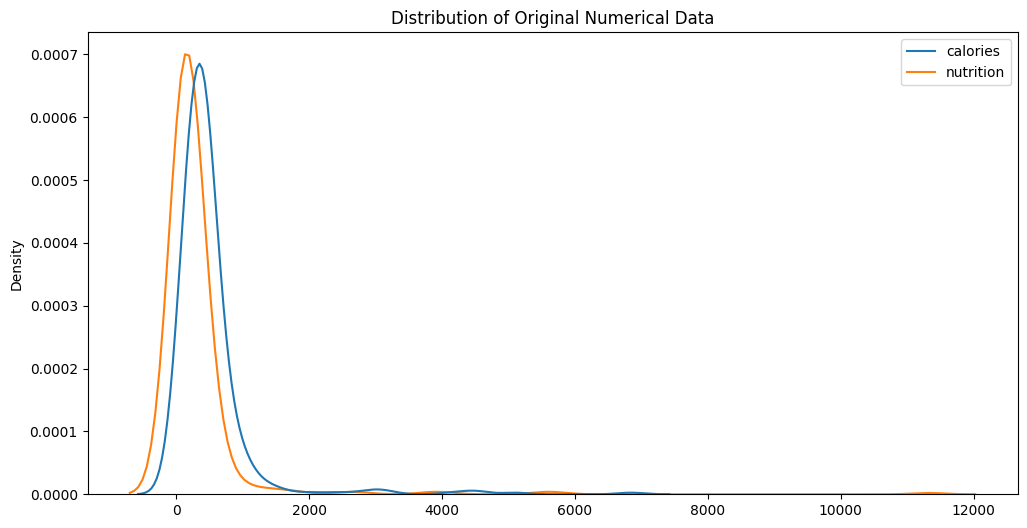

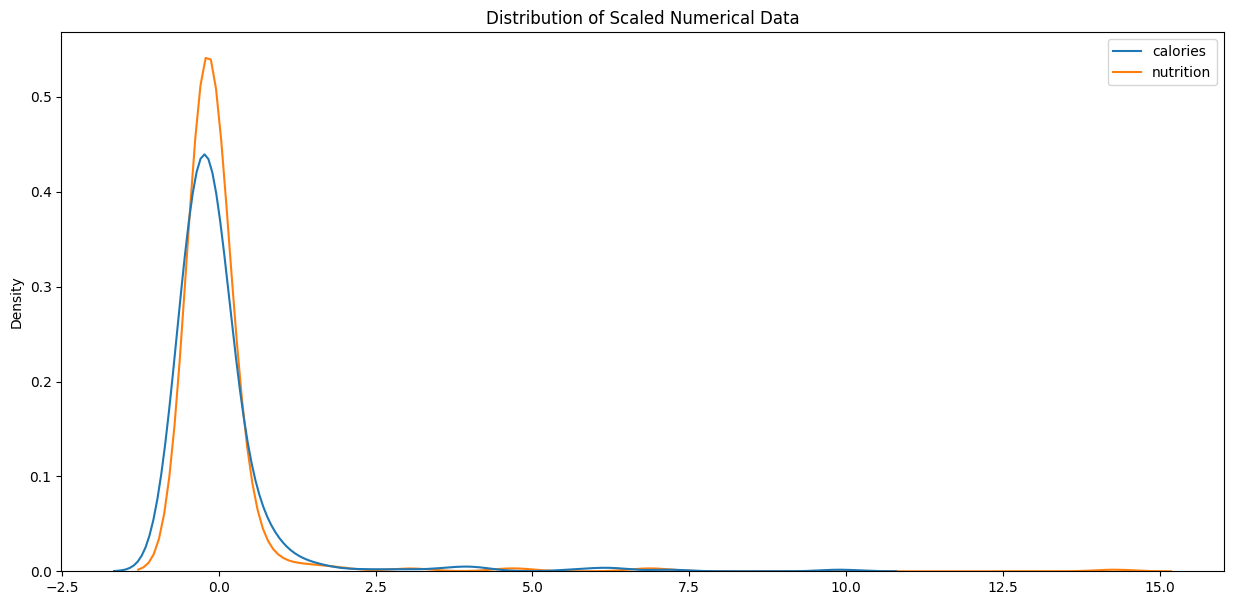

In [37]:
# Create distribution plots of the original numerical data
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=num_data_imp, ax=ax)
ax.set_title('Distribution of Original Numerical Data')

# Create distribution plots of the scaled numerical data
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(data=scaled_num_data_imp, ax=ax)
ax.set_title('Distribution of Scaled Numerical Data')

# Show the plots
plt.show()

# Comments on the Distribution Plot
The distribution plots provide a useful visual representation of the distribution of the non-binary numerical data in the EpiRecipes dataset before and after standard scaling. The original distribution plot shows a wide range of values for the different numerical features, with some columns having a very high range of values compared to others. This highlights the importance of scaling the data to a similar range so that each feature can contribute equally to the machine learning model. The distribution plot of the scaled data shows a much tighter distribution with a mean of 0 and a standard deviation of 1, which confirms that the scaling has effectively transformed the data to a more comparable range. Additionally, the scaled data still preserves the original distribution of the data, which is important for maintaining the integrity of the data. Overall, the distribution plots provide a useful visual representation of the effects of standard scaling on the data, and help to confirm that standard scaling was a good choice for this dataset.

# DMAI40_2023_Part 2.3

In [38]:
# Dependent variable column
y_label = 'cake'

# Independent variables
X = data_imp.loc[:, data_imp.columns != y_label]
X.fillna(0, inplace=True)
display(pd.DataFrame(X))

# Dependent variable
y = data_imp.loc[:, y_label]
y.fillna(0, inplace=True)
display(pd.DataFrame(y))

calories  nutrition
0    0.419354   0.264108
1   -0.290098  -0.076249
2   -0.021910  -0.200486
3   -0.382093  -0.252251
4    0.519145  -0.102132
..        ...        ...
395 -0.093634   0.119165
396 -0.586353  -0.359665
397 -0.692381  -0.372606
398 -0.711092  -0.380371
399 -0.109539  -0.142250

[400 rows x 2 columns]

cake
0     1.0
1     0.0
2     1.0
3     0.0
4     0.0
..    ...
395   0.0
396   0.0
397   0.0
398   0.0
399   0.0

[400 rows x 1 columns]

# Splitting the dataset into training and test sets
While starting the model making process, we decided to split our data into 20% to 80% test to train ratio. By trying several ratios, we figured out this was the best for our models. Allocating 80% of the data for training allows the model to learn from a substantial amount of information, improving its ability to capture underlying patterns. Reserving 20% of the data for testing provides a reasonable-sized test set to evaluate the model's performance and estimate its generalization ability. Having a larger training set compared to the test set helps prevent overfitting by encouraging the model to learn more generalized patterns. A sizable test set contributes to obtaining statistically significant results during model evaluation.

In [39]:
# Determine the test size
my_test_size = 0.2

# spliting data in training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=my_test_size, shuffle=False)
X_train.describe()

calories   nutrition
count  320.000000  320.000000
mean    -0.029929   -0.035579
std      0.976941    0.757977
min     -0.765665   -0.381665
25%     -0.417955   -0.300781
50%     -0.145089   -0.159074
75%      0.012394   -0.056514
max      9.891707    7.006548

# Choosing the predictive models
We decided to apply all the models instead of four because it allows for a thorough evaluation of different models, understanding their strengths and weaknesses. We could identify the most effective models for your specific problem, improving classification performance. Moreover, testing additional models increases the chances of finding a better-performing model, leading to improved results. It provides a more robust evaluation, considering variations in performance due to various factors. Lastly, exploring a wide range of models enhances understanding and knowledge of different algorithms and their suitability.

## Logistic Regression

### Evaluation metrics using test dataset

Accuracy Precision Recall F1 score   ROC AUC
Logistic Regression      0.8       0.0    0.0      0.0  0.457143
KNN                      NaN       NaN    NaN      NaN       NaN
Linear SVM               NaN       NaN    NaN      NaN       NaN
Kernel SVM               NaN       NaN    NaN      NaN       NaN
Naive Bayes              NaN       NaN    NaN      NaN       NaN
Decision Tree            NaN       NaN    NaN      NaN       NaN
Random Forest            NaN       NaN    NaN      NaN       NaN
Adaboost                 NaN       NaN    NaN      NaN       NaN

### Evaluation metrics using k fold cross validation

/home/saib/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy Precision    Recall  F1 score   ROC AUC
Logistic Regression    0.805  0.533333  0.070196  0.122913  0.776167
KNN                      NaN       NaN       NaN       NaN       NaN
Linear SVM               NaN       NaN       NaN       NaN       NaN
Kernel SVM               NaN       NaN       NaN       NaN       NaN
Naive Bayes              NaN       NaN       NaN       NaN       NaN
Decision Tree            NaN       NaN       NaN       NaN       NaN
Random Forest            NaN       NaN       NaN       NaN       NaN
Adaboost                 NaN       NaN       NaN       NaN       NaN

### Decision boundary

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



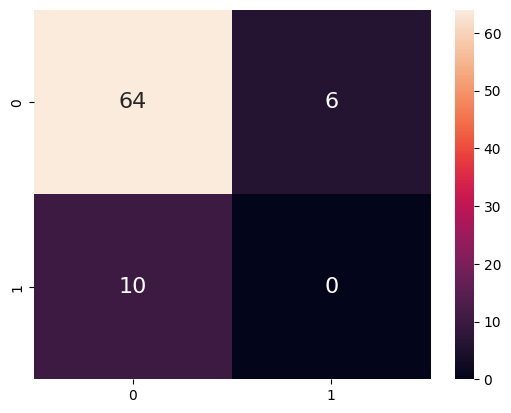

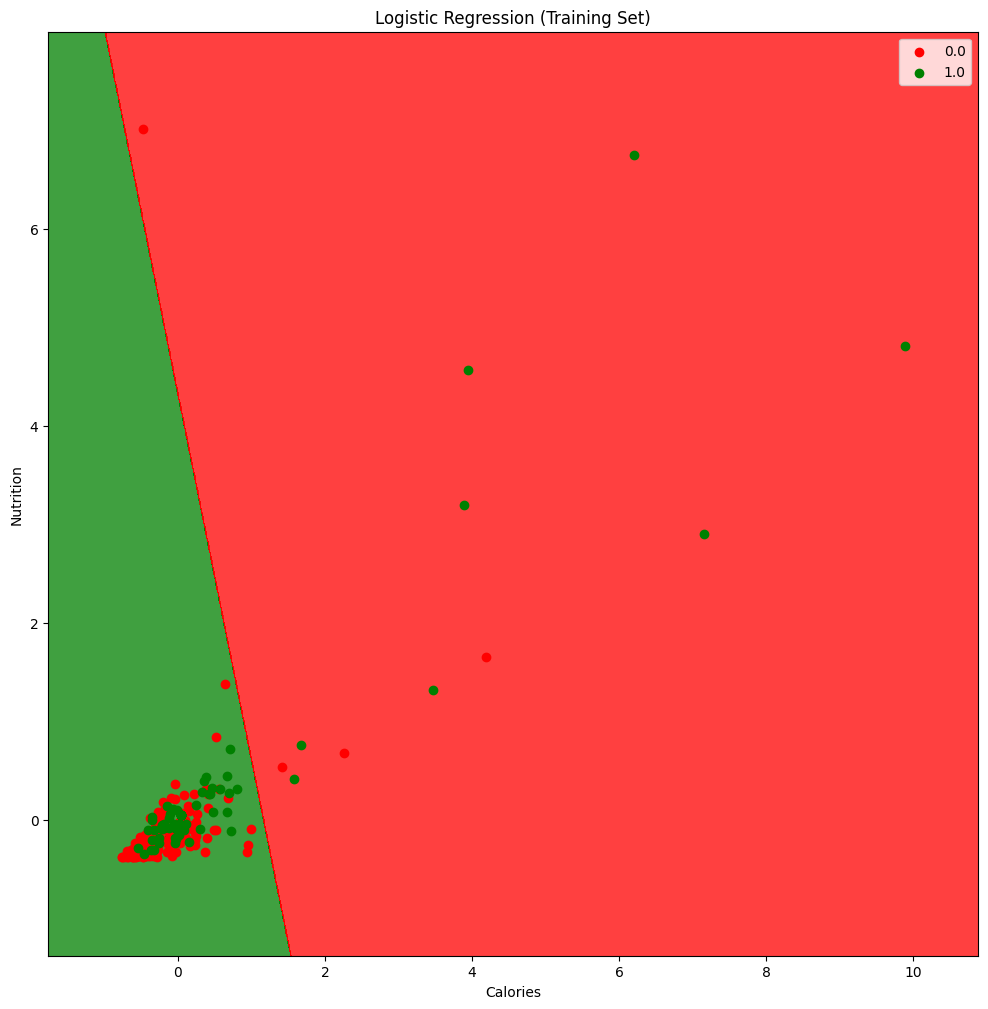

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



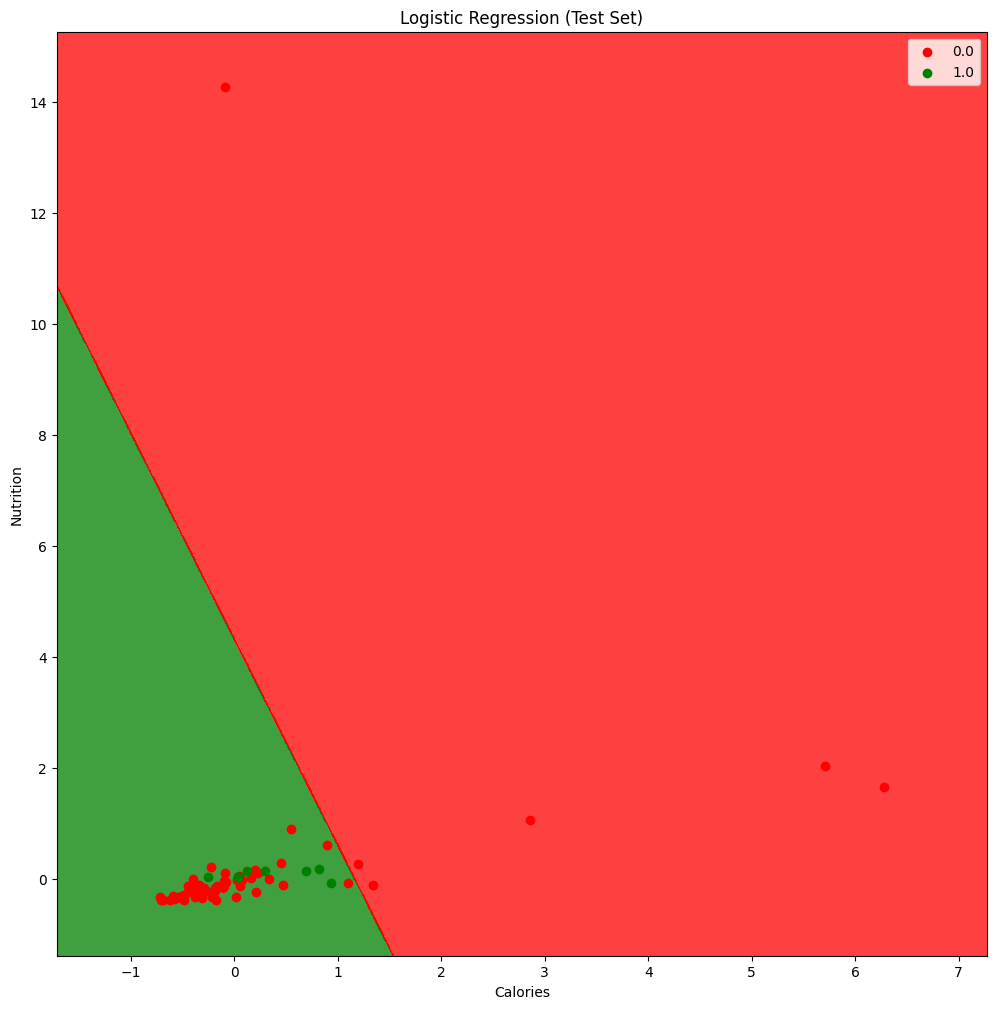

## KNN

### Evaluation metrics using test dataset

Accuracy Precision Recall F1 score   ROC AUC
Logistic Regression      0.8       0.0    0.0      0.0  0.457143
KNN                   0.8625  0.466667    0.7     0.56  0.792857
Linear SVM               NaN       NaN    NaN      NaN       NaN
Kernel SVM               NaN       NaN    NaN      NaN       NaN
Naive Bayes              NaN       NaN    NaN      NaN       NaN
Decision Tree            NaN       NaN    NaN      NaN       NaN
Random Forest            NaN       NaN    NaN      NaN       NaN
Adaboost                 NaN       NaN    NaN      NaN       NaN

### Evaluation metrics using k fold cross validation

Accuracy Precision    Recall  F1 score   ROC AUC
Logistic Regression    0.805  0.533333  0.070196  0.122913  0.776167
KNN                     0.84  0.687619  0.395294   0.45958  0.835937
Linear SVM               NaN       NaN       NaN       NaN       NaN
Kernel SVM               NaN       NaN       NaN       NaN       NaN
Naive Bayes              NaN       NaN       NaN       NaN       NaN
Decision Tree            NaN       NaN       NaN       NaN       NaN
Random Forest            NaN       NaN       NaN       NaN       NaN
Adaboost                 NaN       NaN       NaN       NaN       NaN

### Decision boundary

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



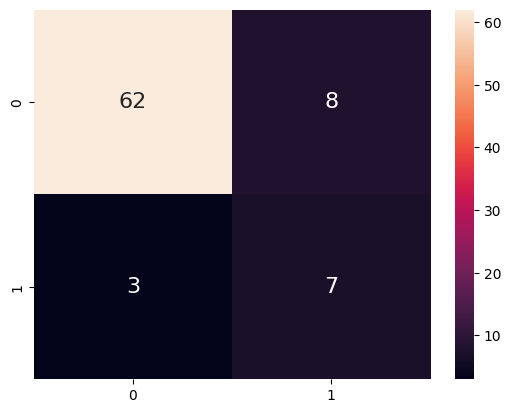

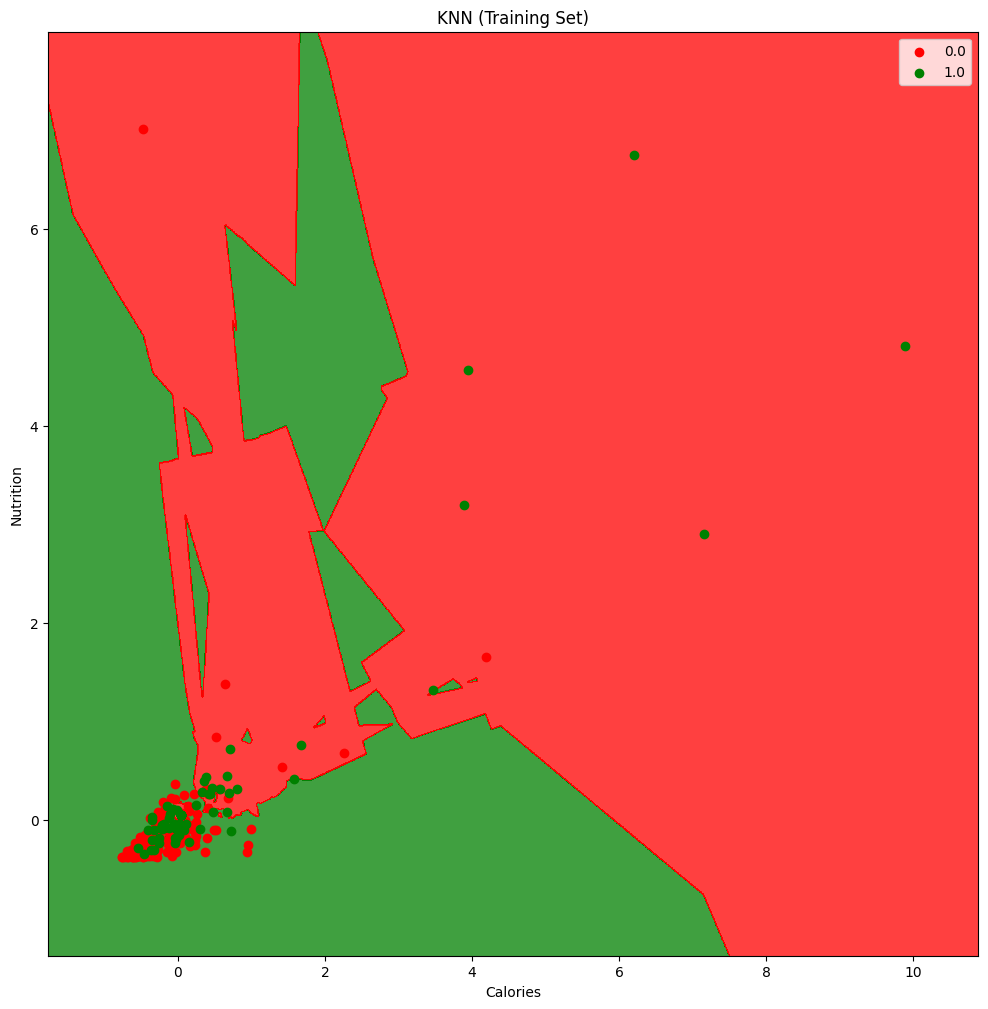

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



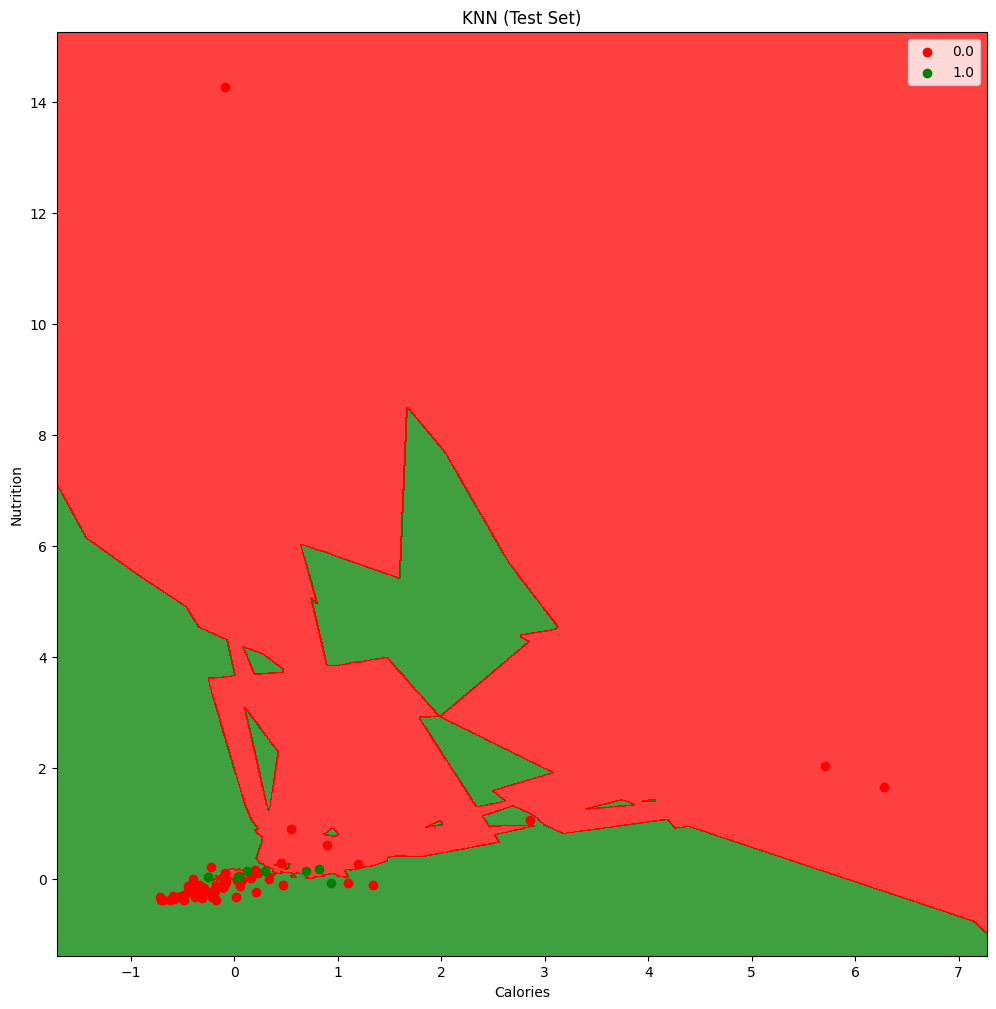

## Linear SVM

### Evaluation metrics using test dataset

Accuracy Precision Recall F1 score   ROC AUC
Logistic Regression      0.8       0.0    0.0      0.0  0.457143
KNN                   0.8625  0.466667    0.7     0.56  0.792857
Linear SVM            0.8375       0.0    0.0      0.0  0.478571
Kernel SVM               NaN       NaN    NaN      NaN       NaN
Naive Bayes              NaN       NaN    NaN      NaN       NaN
Decision Tree            NaN       NaN    NaN      NaN       NaN
Random Forest            NaN       NaN    NaN      NaN       NaN
Adaboost                 NaN       NaN    NaN      NaN       NaN

### Evaluation metrics using k fold cross validation

/home/saib/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/saib/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/saib/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy Precision    Recall  F1 score   ROC AUC
Logistic Regression    0.805  0.533333  0.070196  0.122913  0.776167
KNN                     0.84  0.687619  0.395294   0.45958  0.835937
Linear SVM            0.8025       0.2  0.013333     0.025  0.726524
Kernel SVM               NaN       NaN       NaN       NaN       NaN
Naive Bayes              NaN       NaN       NaN       NaN       NaN
Decision Tree            NaN       NaN       NaN       NaN       NaN
Random Forest            NaN       NaN       NaN       NaN       NaN
Adaboost                 NaN       NaN       NaN       NaN       NaN

### Decision boundary

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



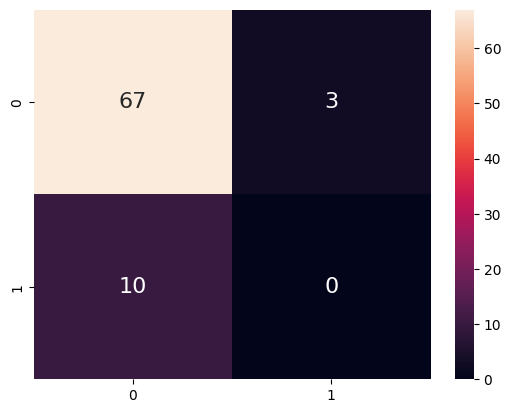

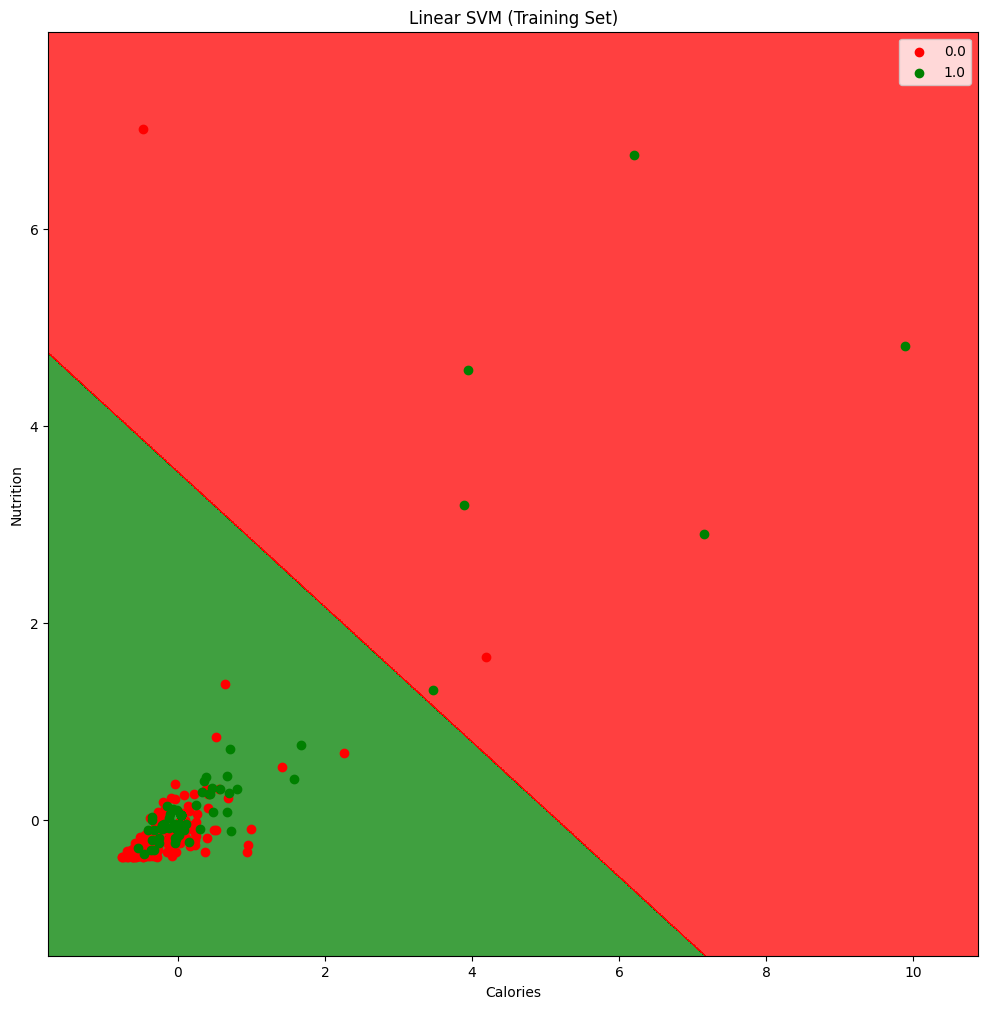

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



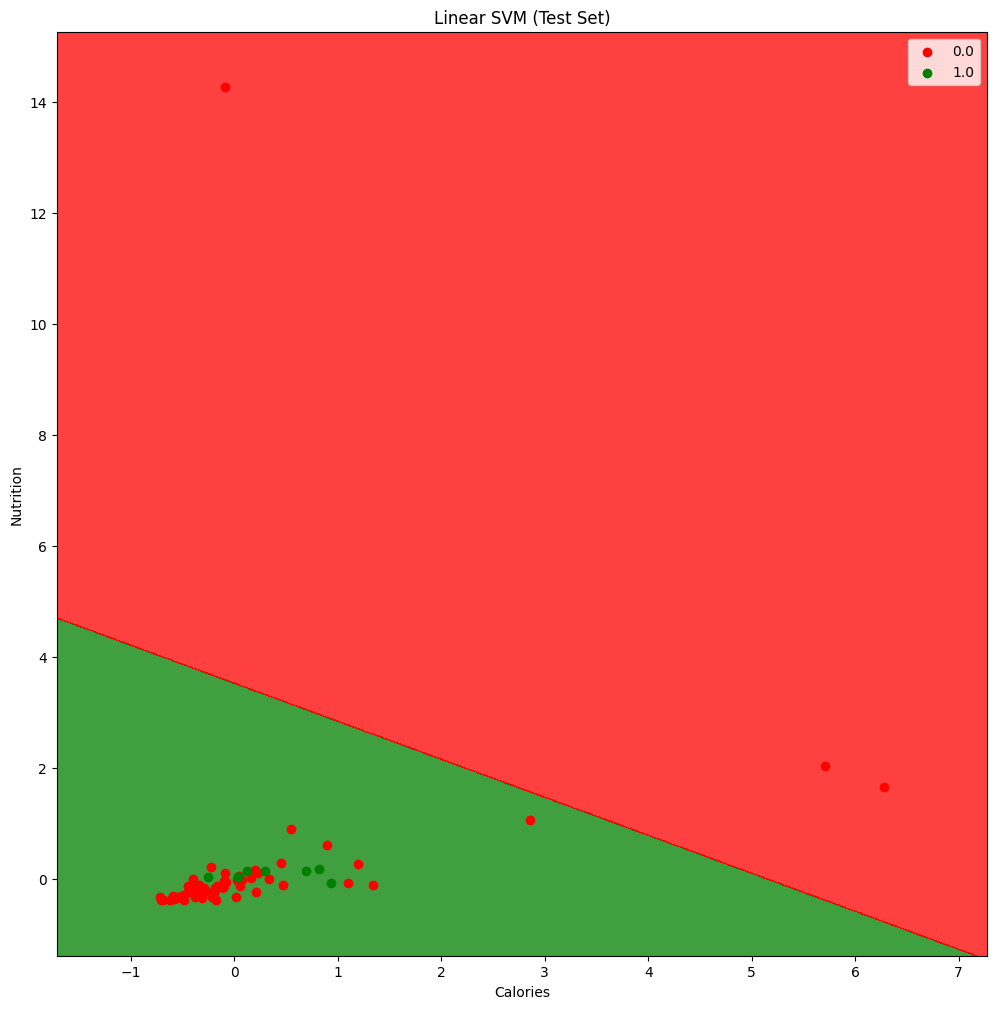

## Kernel SVM

### Evaluation metrics using test dataset

Accuracy Precision Recall F1 score   ROC AUC
Logistic Regression      0.8       0.0    0.0      0.0  0.457143
KNN                   0.8625  0.466667    0.7     0.56  0.792857
Linear SVM            0.8375       0.0    0.0      0.0  0.478571
Kernel SVM            0.7875       0.0    0.0      0.0      0.45
Naive Bayes              NaN       NaN    NaN      NaN       NaN
Decision Tree            NaN       NaN    NaN      NaN       NaN
Random Forest            NaN       NaN    NaN      NaN       NaN
Adaboost                 NaN       NaN    NaN      NaN       NaN

### Evaluation metrics using k fold cross validation

/home/saib/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/saib/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/saib/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/saib/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy Precision    Recall  F1 score   ROC AUC
Logistic Regression    0.805  0.533333  0.070196  0.122913  0.776167
KNN                     0.84  0.687619  0.395294   0.45958  0.835937
Linear SVM            0.8025       0.2  0.013333     0.025  0.726524
Kernel SVM              0.79       0.0       0.0       0.0  0.750256
Naive Bayes              NaN       NaN       NaN       NaN       NaN
Decision Tree            NaN       NaN       NaN       NaN       NaN
Random Forest            NaN       NaN       NaN       NaN       NaN
Adaboost                 NaN       NaN       NaN       NaN       NaN

### Decision boundary

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



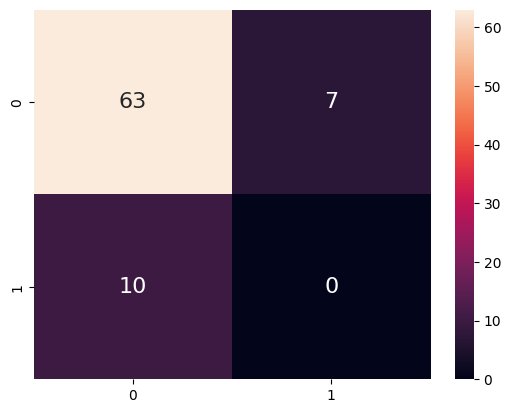

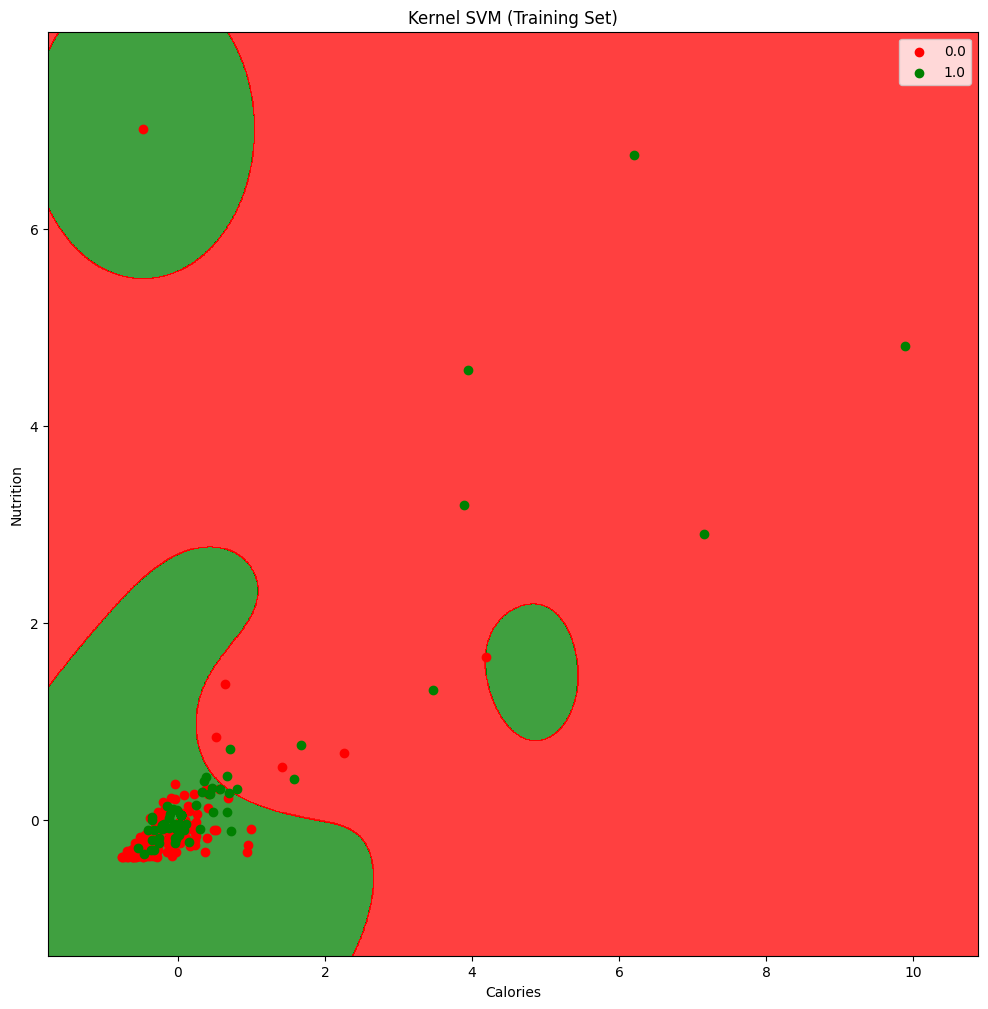

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



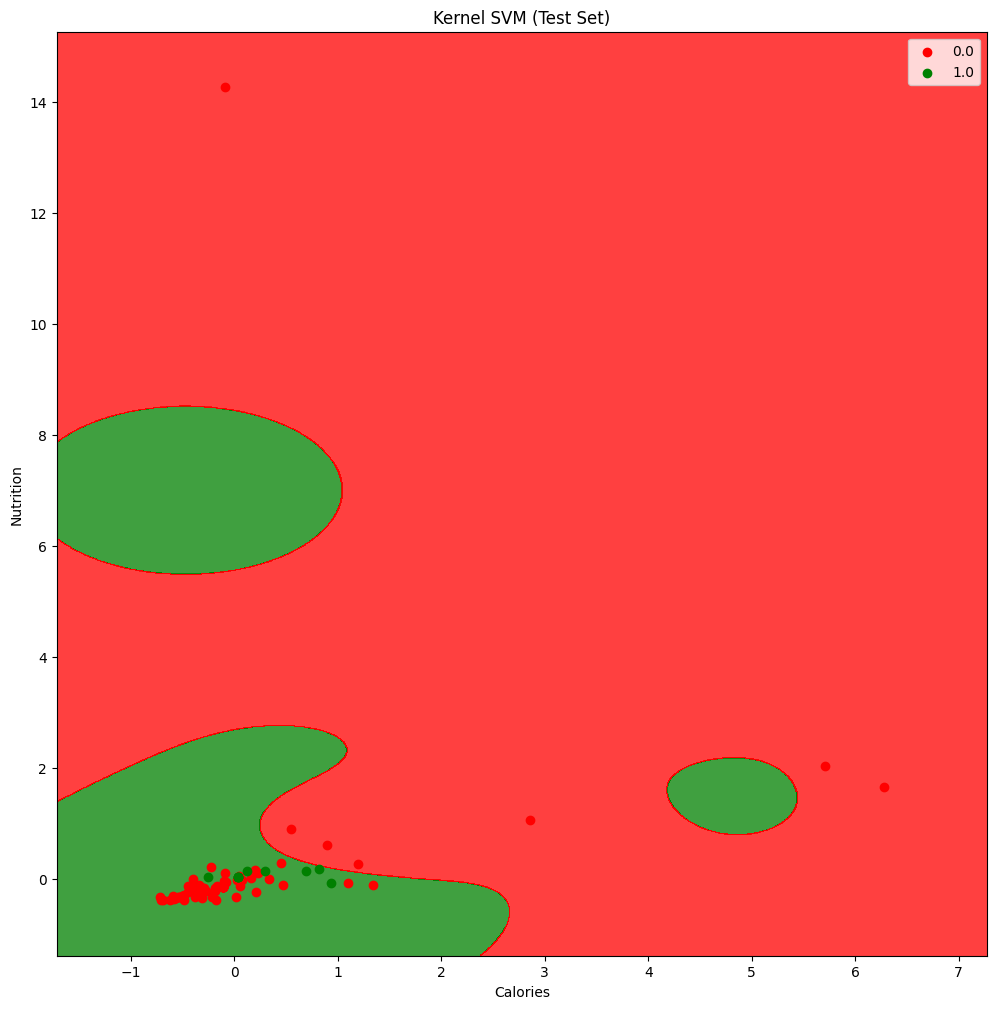

## Naive Bayes

### Evaluation metrics using test dataset

Accuracy Precision Recall F1 score   ROC AUC
Logistic Regression      0.8       0.0    0.0      0.0  0.457143
KNN                   0.8625  0.466667    0.7     0.56  0.792857
Linear SVM            0.8375       0.0    0.0      0.0  0.478571
Kernel SVM            0.7875       0.0    0.0      0.0      0.45
Naive Bayes            0.775       0.0    0.0      0.0  0.442857
Decision Tree            NaN       NaN    NaN      NaN       NaN
Random Forest            NaN       NaN    NaN      NaN       NaN
Adaboost                 NaN       NaN    NaN      NaN       NaN

### Evaluation metrics using k fold cross validation

Accuracy Precision    Recall  F1 score   ROC AUC
Logistic Regression    0.805  0.533333  0.070196  0.122913  0.776167
KNN                     0.84  0.687619  0.395294   0.45958  0.835937
Linear SVM            0.8025       0.2  0.013333     0.025  0.726524
Kernel SVM              0.79       0.0       0.0       0.0  0.750256
Naive Bayes            0.795      0.45  0.081961  0.135612  0.767762
Decision Tree            NaN       NaN       NaN       NaN       NaN
Random Forest            NaN       NaN       NaN       NaN       NaN
Adaboost                 NaN       NaN       NaN       NaN       NaN

### Decision boundary

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



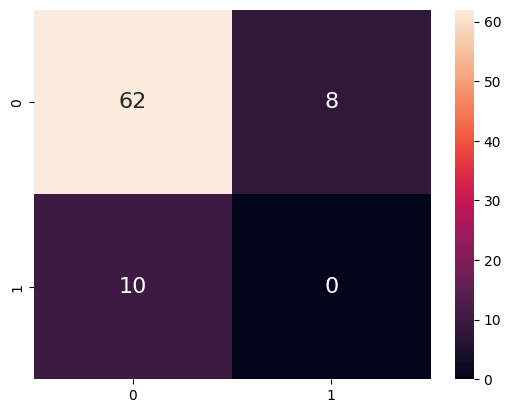

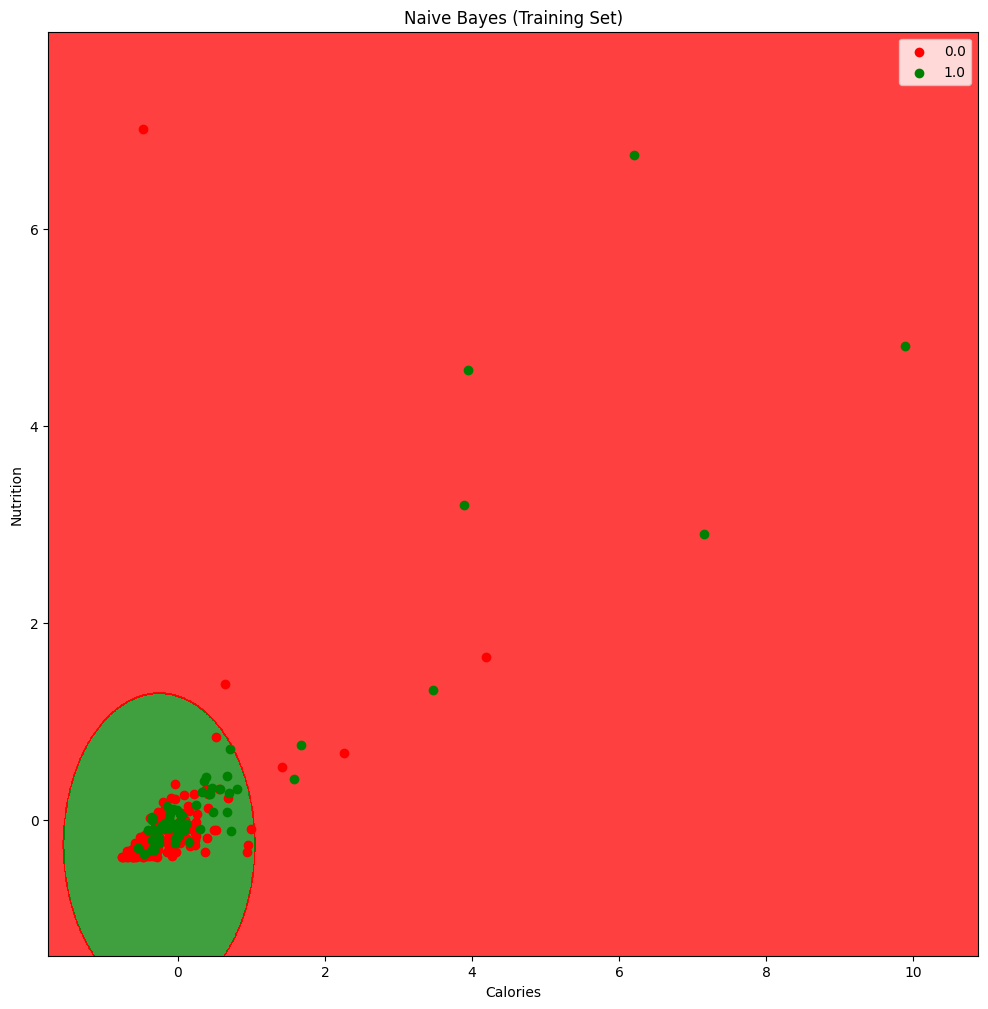

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



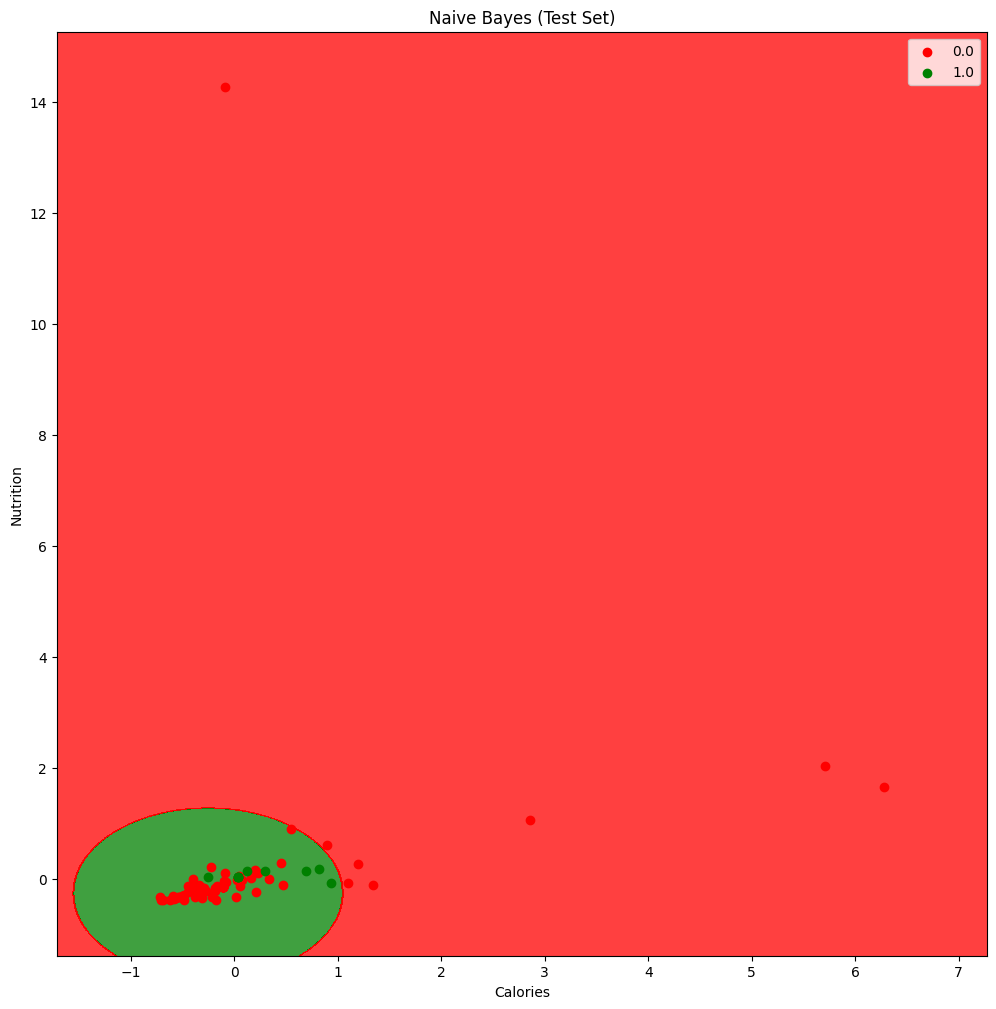

## Decision Tree

### Evaluation metrics using test dataset

Accuracy Precision Recall  F1 score   ROC AUC
Logistic Regression      0.8       0.0    0.0       0.0  0.457143
KNN                   0.8625  0.466667    0.7      0.56  0.792857
Linear SVM            0.8375       0.0    0.0       0.0  0.478571
Kernel SVM            0.7875       0.0    0.0       0.0      0.45
Naive Bayes            0.775       0.0    0.0       0.0  0.442857
Decision Tree          0.825  0.357143    0.5  0.416667  0.685714
Random Forest            NaN       NaN    NaN       NaN       NaN
Adaboost                 NaN       NaN    NaN       NaN       NaN

### Evaluation metrics using k fold cross validation

Accuracy Precision    Recall  F1 score   ROC AUC
Logistic Regression    0.805  0.533333  0.070196  0.122913  0.776167
KNN                     0.84  0.687619  0.395294   0.45958  0.835937
Linear SVM            0.8025       0.2  0.013333     0.025  0.726524
Kernel SVM              0.79       0.0       0.0       0.0  0.750256
Naive Bayes            0.795      0.45  0.081961  0.135612  0.767762
Decision Tree         0.8125  0.506161  0.438824  0.461745   0.72308
Random Forest            NaN       NaN       NaN       NaN       NaN
Adaboost                 NaN       NaN       NaN       NaN       NaN

### Decision boundary

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



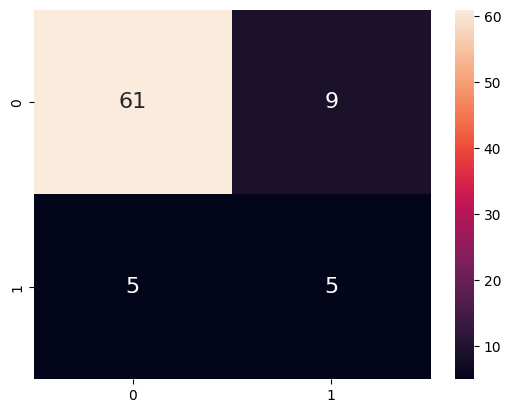

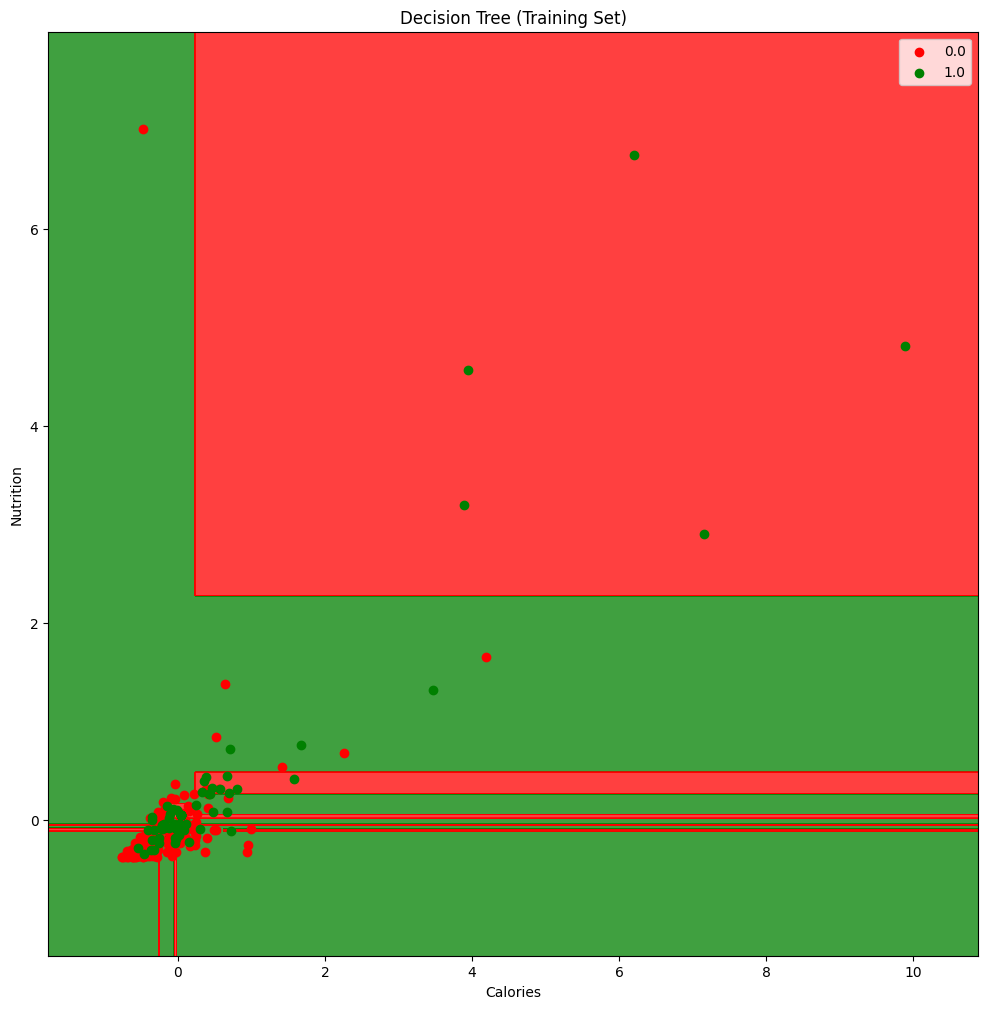

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



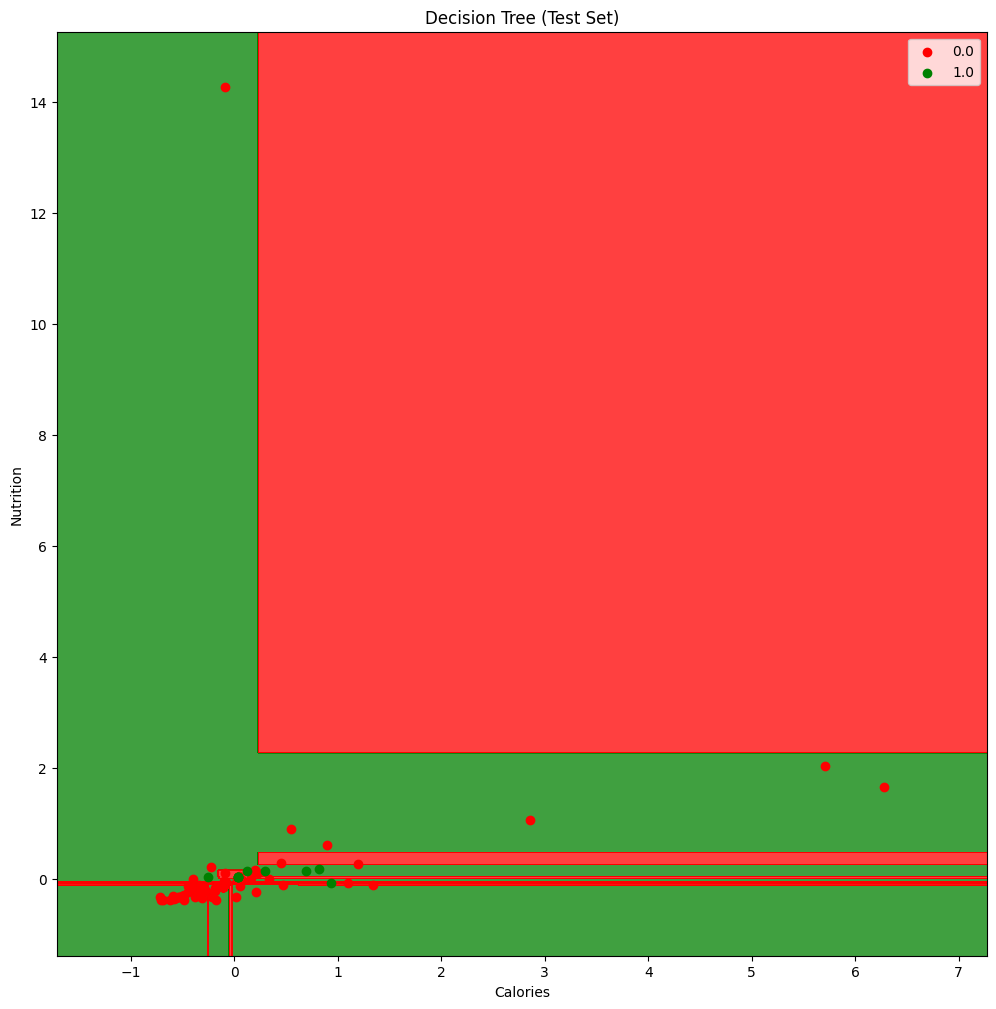

## Random Forest

### Evaluation metrics using test dataset

Accuracy Precision Recall  F1 score   ROC AUC
Logistic Regression      0.8       0.0    0.0       0.0  0.457143
KNN                   0.8625  0.466667    0.7      0.56  0.792857
Linear SVM            0.8375       0.0    0.0       0.0  0.478571
Kernel SVM            0.7875       0.0    0.0       0.0      0.45
Naive Bayes            0.775       0.0    0.0       0.0  0.442857
Decision Tree          0.825  0.357143    0.5  0.416667  0.685714
Random Forest          0.875       0.5    0.7  0.583333       0.8
Adaboost                 NaN       NaN    NaN       NaN       NaN

### Evaluation metrics using k fold cross validation

Accuracy Precision    Recall  F1 score   ROC AUC
Logistic Regression    0.805  0.533333  0.070196  0.122913  0.776167
KNN                     0.84  0.687619  0.395294   0.45958  0.835937
Linear SVM            0.8025       0.2  0.013333     0.025  0.726524
Kernel SVM              0.79       0.0       0.0       0.0  0.750256
Naive Bayes            0.795      0.45  0.081961  0.135612  0.767762
Decision Tree         0.8125  0.506161  0.438824  0.461745   0.72308
Random Forest          0.835  0.610606  0.462157  0.509324  0.858437
Adaboost                 NaN       NaN       NaN       NaN       NaN

### Decision boundary

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



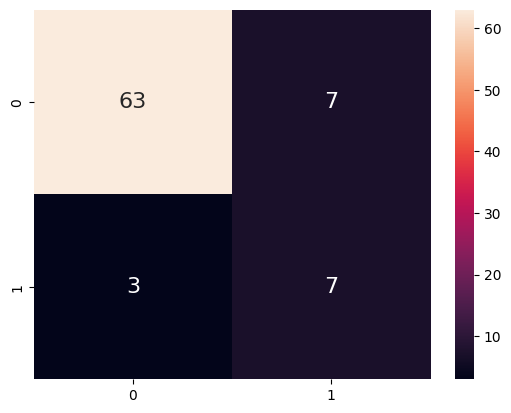

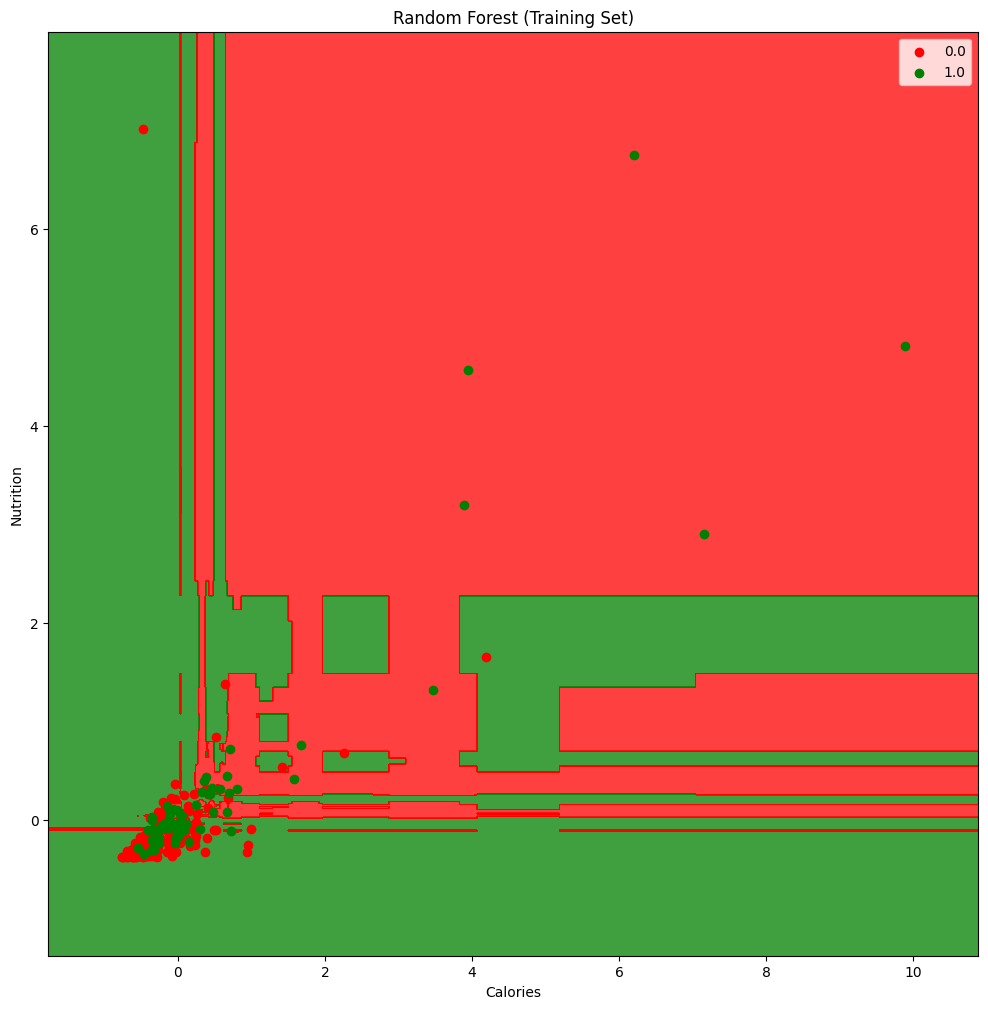

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



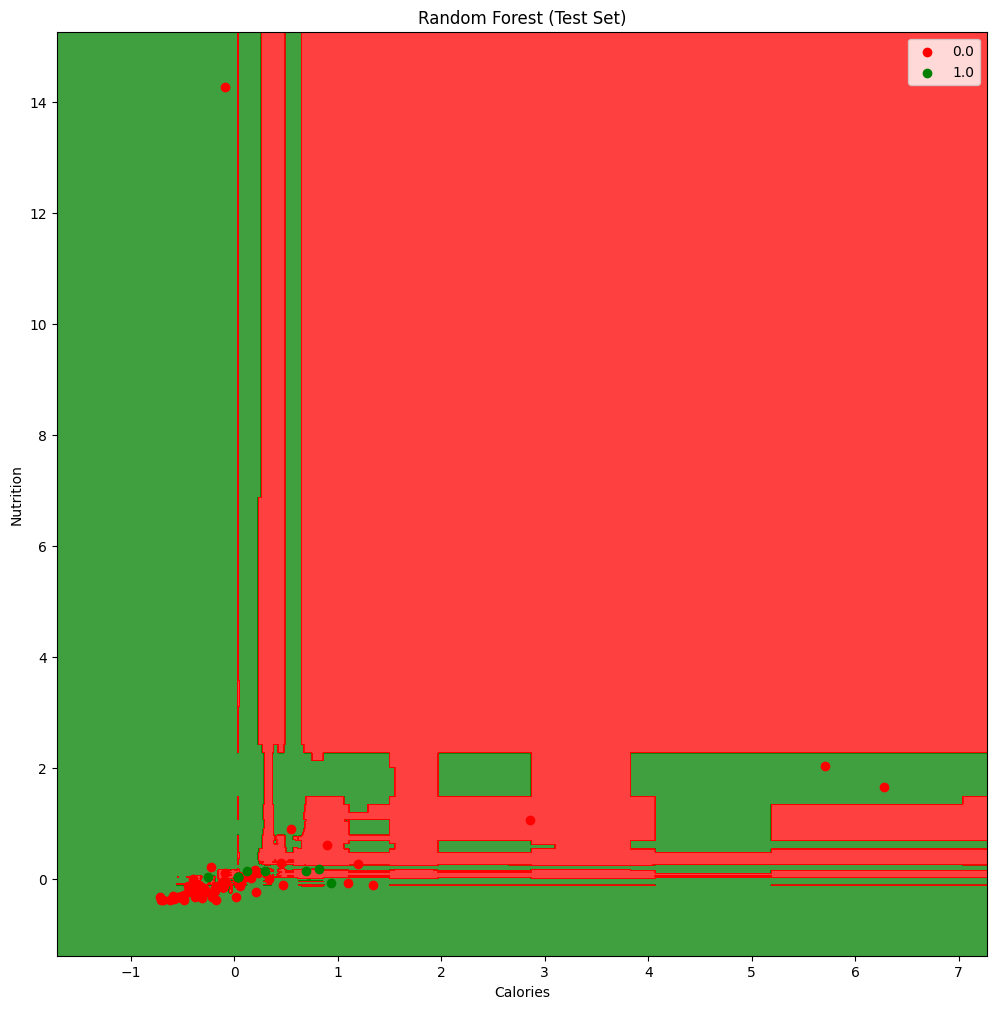

## No code for Adaboost found

## Adaboost

### Evaluation metrics using test dataset

Accuracy Precision Recall  F1 score   ROC AUC
Logistic Regression      0.8       0.0    0.0       0.0  0.457143
KNN                   0.8625  0.466667    0.7      0.56  0.792857
Linear SVM            0.8375       0.0    0.0       0.0  0.478571
Kernel SVM            0.7875       0.0    0.0       0.0      0.45
Naive Bayes            0.775       0.0    0.0       0.0  0.442857
Decision Tree          0.825  0.357143    0.5  0.416667  0.685714
Random Forest          0.875       0.5    0.7  0.583333       0.8
Adaboost               0.875       0.5    0.7  0.583333       0.8

### Evaluation metrics using k fold cross validation

Accuracy Precision    Recall  F1 score   ROC AUC
Logistic Regression    0.805  0.533333  0.070196  0.122913  0.776167
KNN                     0.84  0.687619  0.395294   0.45958  0.835937
Linear SVM            0.8025       0.2  0.013333     0.025  0.726524
Kernel SVM              0.79       0.0       0.0       0.0  0.750256
Naive Bayes            0.795      0.45  0.081961  0.135612  0.767762
Decision Tree         0.8125  0.506161  0.438824  0.461745   0.72308
Random Forest          0.835  0.610606  0.462157  0.509324  0.858437
Adaboost               0.835  0.610606  0.462157  0.509324  0.858437

### Decision boundary

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



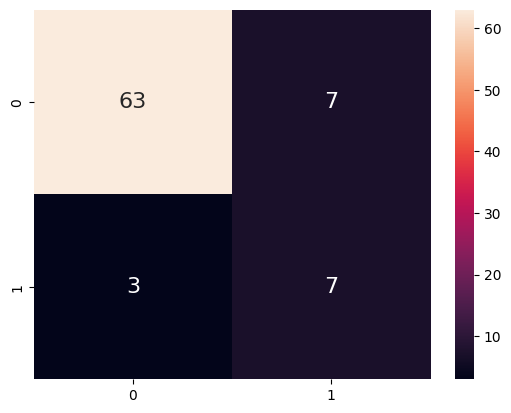

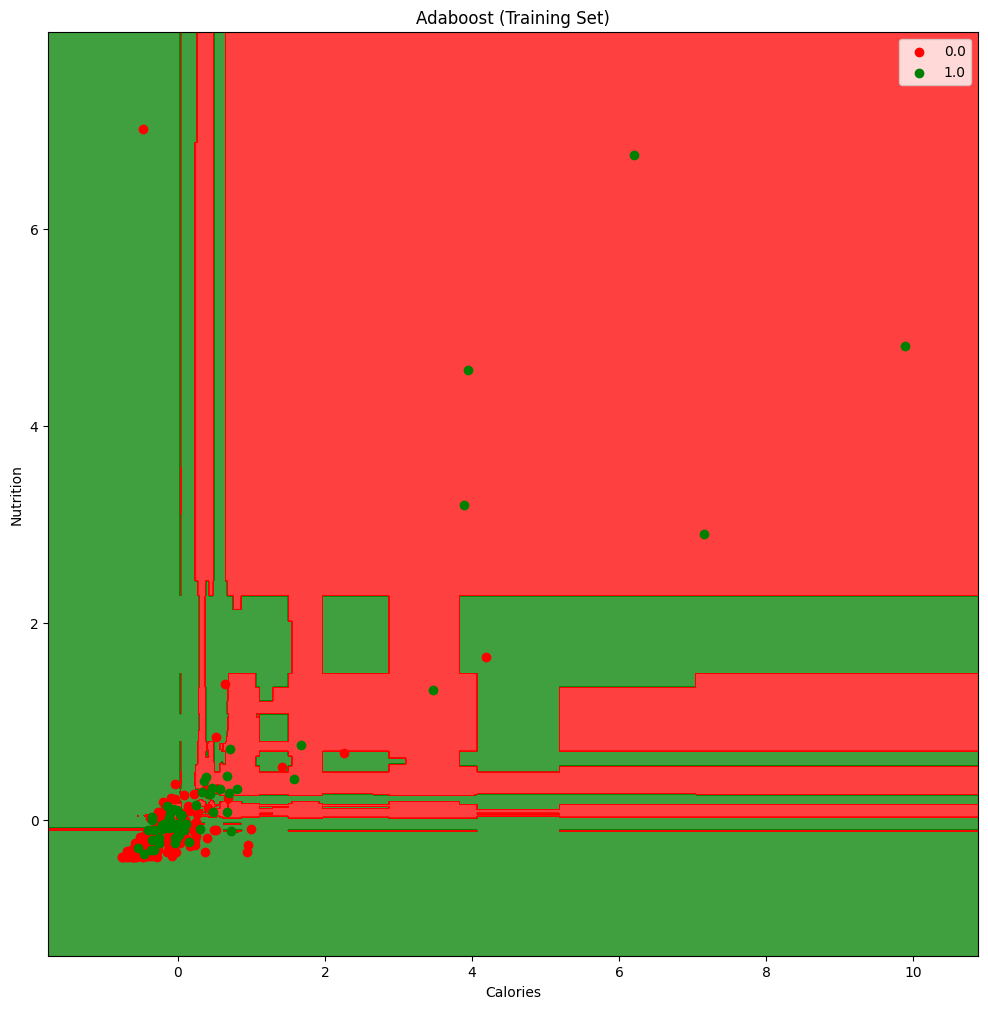

/home/saib/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



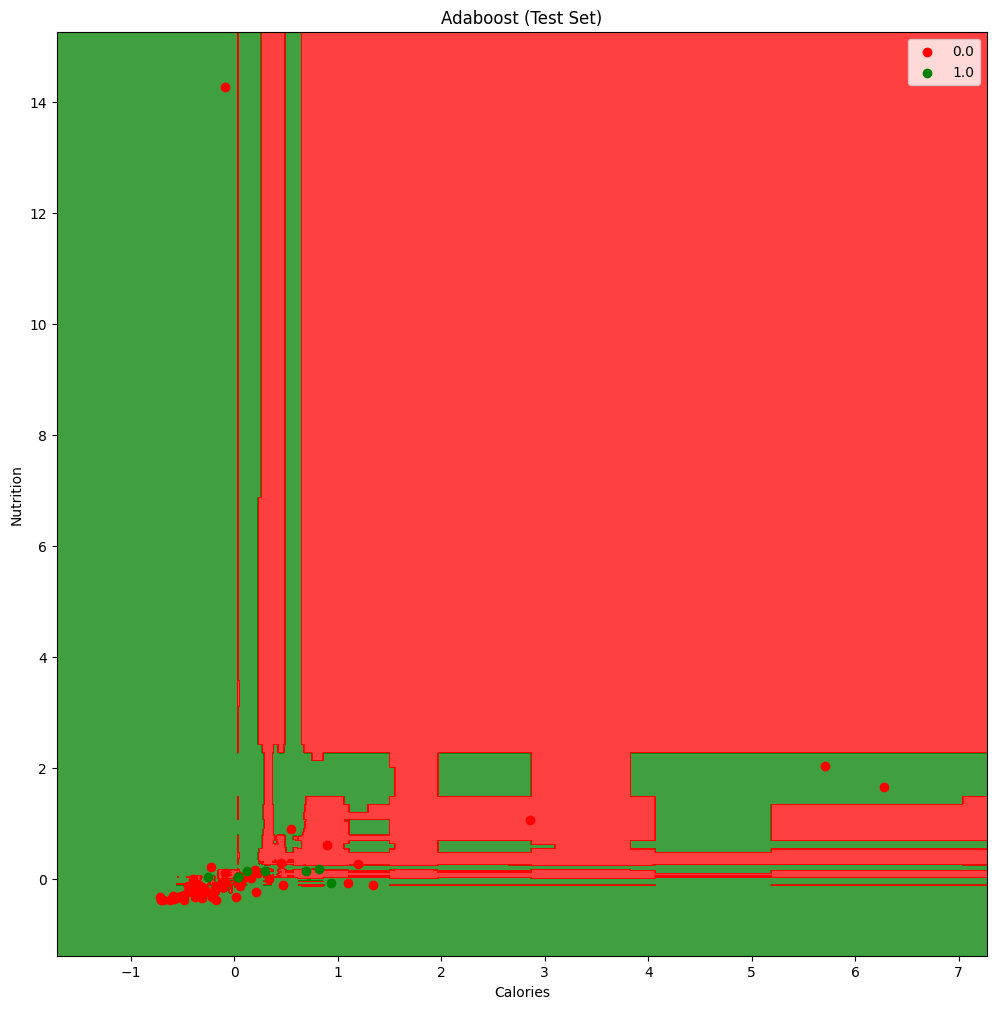

In [44]:
from IPython.display import display, Markdown

# Iterate over all methods
for method in methods:
    # Depending on the method, different class has to be called to create the model
    if method == 'Logistic Regression':
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression()
        
    elif method == 'KNN':
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean')
    
    elif method == 'Linear SVM':
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'linear')
        
    elif method == 'Kernel SVM':
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf')
    
    elif method == 'Naive Bayes':
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        
    elif method == 'Decision Tree':
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0, min_samples_split = 10)
        
    elif method == 'Random Forest':
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 100, oob_score=True, criterion = 'gini', random_state = 0)
    
    elif method == 'AdaBoost':
        from sklearn.ensemble import AdaBoostClassifier
        classifier = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
        
    else:
        display(Markdown("## No code for " + method + " found"))
        
    # Display method name in markdown    
    display(Markdown("## " + method))
    
    # Fit the data to the model
    classifier.fit(X_train, y_train)
    
    # Prediction using test set 
    y_pred = classifier.predict(X_test)
    
    
    # Calculate evaluation metrics using test dataset
    display(Markdown("### Evaluation metrics using test dataset"))
    calculate_metrics(quality_df, method, y_test, y_pred)
    display(quality_df)
    
    # Calculate evaluation metrics using k fold cross validation
    display(Markdown("### Evaluation metrics using k fold cross validation"))
    calculate_cv(quality_cv_df, classifier, method, X, y)
    display(quality_cv_df)
    
    # Display decision boundary for training and test sets.
    display(Markdown("### Decision boundary"))
    plot_decision_boundary(classifier, X_train.to_numpy(), y_train, method + ' (Training Set)')
    plot_decision_boundary(classifier, X_test.to_numpy(), y_test, method + ' (Test Set)')


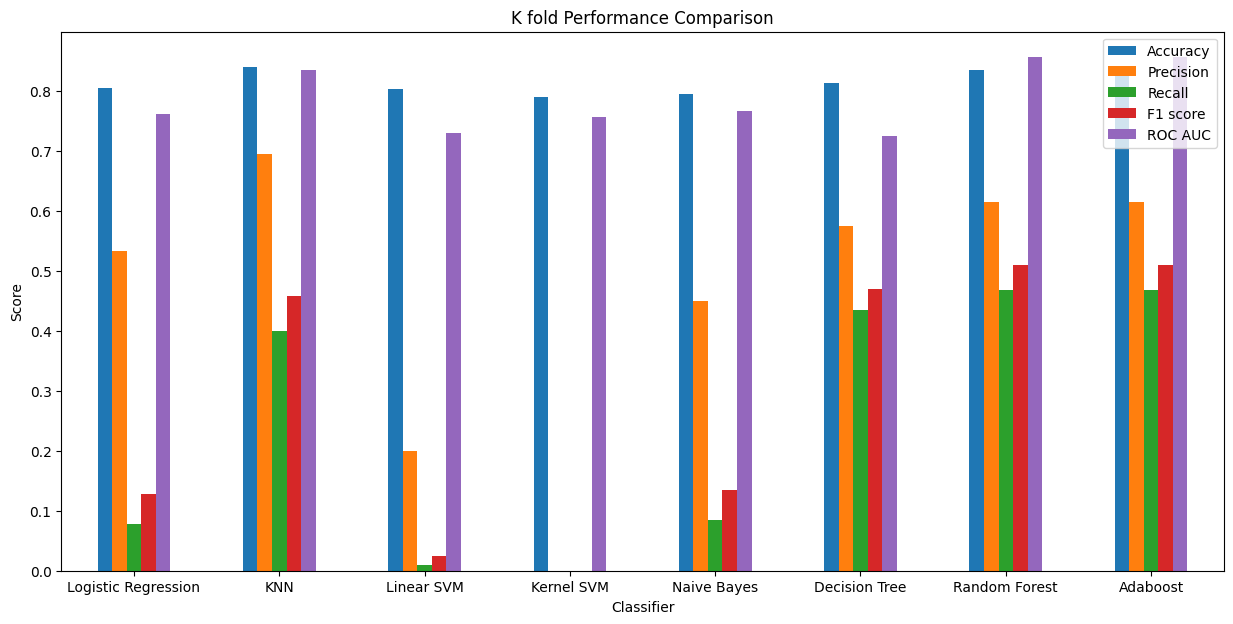

In [54]:
# creating dataframe of k_fold data values to plot a bar graph

table = {'Accuracy': [0.805, 0.84, 0.8025, 0.79, 0.795, 0.8125, 0.835,0.835],
'Precision': [0.53333, 0.694211, 0.2, 0.0, 0.45, 0.574689, 0.61512, 0.61512],
'Recall': [0.078431, 0.398824, 0.01, 0.0, 0.083725, 0.433725, 0.467255,0.467255],
'F1 score': [0.12775, 0.457192, 0.025, 0.00, 0.135, 0.469048, 0.509669, 0.509669],
'ROC AUC': [0.761418, 0.834365, 0.728771, 0.755405, 0.765424, 0.724442, 0.855339,0.855339]}

index = ['Logistic Regression', 'KNN', 'Linear SVM', 'Kernel SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Adaboost']
k_fold = pd.DataFrame(table, index=index)



# plot multiple bars graph
ax = k_fold.plot(kind='bar', rot=0, figsize=(15, 7))
ax.set_xlabel('Classifier')
ax.set_ylabel('Score')
ax.set_title('K fold Performance Comparison')
plt.legend(loc='upper right')
plt.show()




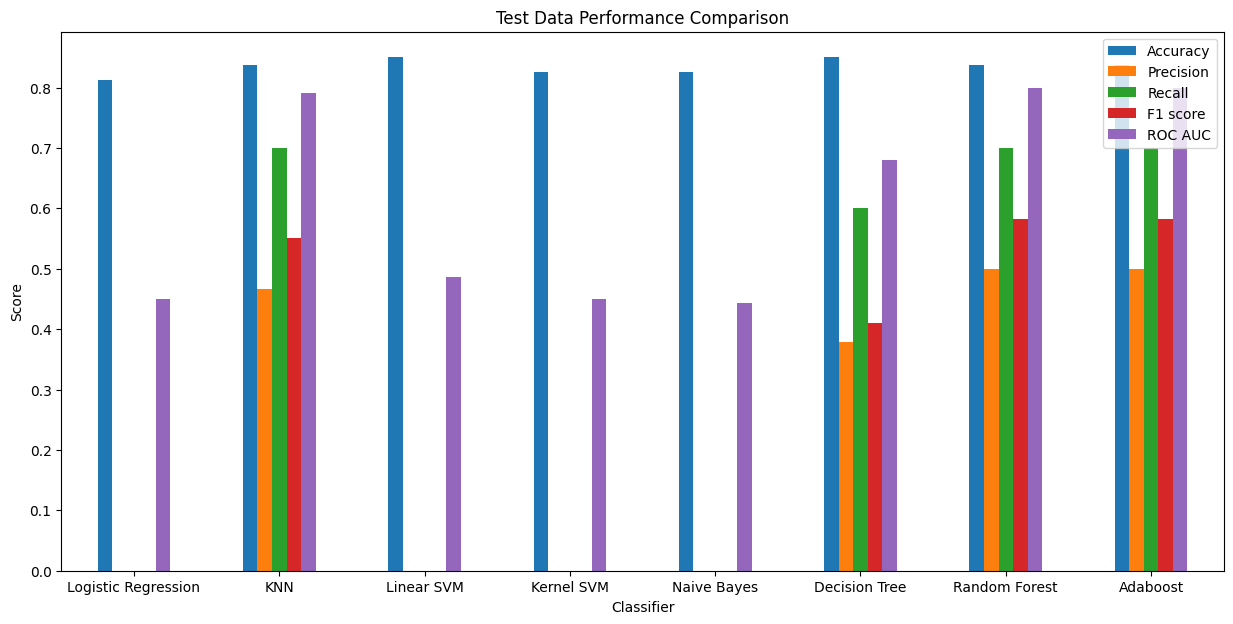

In [55]:
# creating dataframe of test_data data values to plot a bar graph

# create a dictionary with data
table = {'Accuracy': [0.8125, 0.8375, 0.85, 0.825, 0.825, 0.85, 0.8375,0.8375],
        'Precision': [0.0, 0.46666, 0.0, 0.0, 0.0, 0.378571, 0.5,0.5],
        'Recall': [0.0, 0.7, 0.0, 0.0, 0.0, 0.6, 0.7,0.7],
        'F1 score': [0.0, 0.551724, 0.0, 0.0, 0.0, 0.41, 0.581724, 0.581724],
        'ROC AUC': [0.45, 0.791429, 0.485714, 0.45, 0.4428, 0.68, 0.8,0.8]
        }  

# create a list of index values
index = ['Logistic Regression', 'KNN', 'Linear SVM', 'Kernel SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Adaboost']

# create a dataframe
test_d = pd.DataFrame(table, index=index)

# plot multiple bars graph
ax = test_d.plot(kind='bar', rot=0, figsize=(15, 7))
ax.set_xlabel('Classifier')
ax.set_ylabel('Score')
ax.set_title('Test Data Performance Comparison')
plt.legend(loc='upper right')
plt.show()


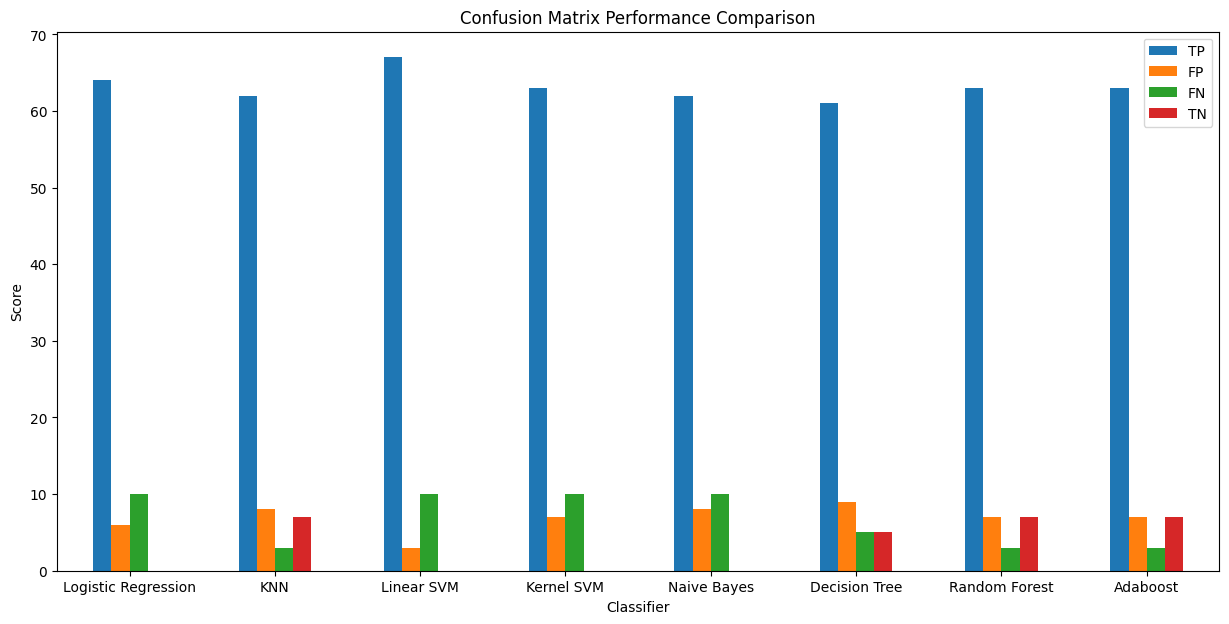

In [56]:
# creating dataframe of confusion_matrix data values to plot a bar graph

table = {'TP': [64, 62,67,63,62,61, 63, 63],
        'FP': [6,8,3,7,8,9,7, 7],
        'FN': [10,3,10,10,10,5,3, 3],
        'TN': [0,7,0,0,0,5,7,7]
        }

# create a list of index values
index = ['Logistic Regression', 'KNN', 'Linear SVM', 'Kernel SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Adaboost']

# create a dataframe
conf = pd.DataFrame(table, index=index)

# plot multiple bars graph
ax = conf.plot(kind='bar', rot=0, figsize=(15, 7))
ax.set_xlabel('Classifier')
ax.set_ylabel('Score')
ax.set_title('Confusion Matrix Performance Comparison')
plt.legend(loc='upper right')
plt.show()